In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#PARAMETROS DO MODELO
D = 0.0039
P = 0.0453
C0 = 8e3

#DOMINIO DO MODELO
L = 2
TF = 20
TAM = 100

# DISCRETIZAÇÃO DO DOMÍNIO
X = np.linspace(-1, 1, TAM)
Y = np.linspace(-1, 1, TAM)

#IMPLEMENTAÇÃO DA MATRIZ DOS COEFICIENTES
dx, dy = X[1], Y[1]
dt = 1.

LAMBDA1 = (2 * D * dt / dx**2) - 0.5 * dt + 1.
LAMBDA2 = -(2 * D * dt / dx**2) + 0.5 * dt + 1.
GAMMA = 0.5 * D * dt / dx**2

In [4]:
def matrizesFH(N_S):

        M = np.zeros((N_S**2, N_S**2))
        N = np.zeros((N_S**2, N_S**2))

        for i in range(N_S**2):
        
                # VERTICE: BAIXO, ESQUERDA
                if i == 0:

                        M[i,0] = 6.
                        M[i,1] = -4.
                        M[i,2] = 1.
                        M[i,N_S] = -4.
                        M[i,2*N_S] = 1.

                        N[i,0] = -6.
                        N[i,1] = 4.
                        N[i,2] = -1.
                        N[i,N_S] = 4.
                        N[i,2*N_S] = -1.

                # VERTICE: BAIXO, DIREITA
                elif i == N_S-1: 

                        M[i,N_S-1] = 6.
                        M[i,N_S-2] = -4.
                        M[i,N_S-3] = 1.
                        M[i,N_S-1] = -4.
                        M[i,2*N_S-1] = 1.

                        N[i,N_S-2] = -6.
                        N[i,N_S-3] = 4.
                        N[i,N_S-4] = -1.
                        N[i,N_S-1] = 4.
                        N[i,2*N_S-1] = -1.

                # VERTICE: CIMA, ESQUERDA
                elif i == N_S**2 - N_S:

                        M[i,-N_S+1] = 6.
                        M[i,-N_S+2] = -4.
                        M[i,-N_S+3] = 1.
                        M[i,-N_S] = -4.
                        M[i,-2*N_S] = 1.

                        N[i,-N_S+1] = -6.
                        N[i,-N_S+2] = 4.
                        N[i,-N_S+3] = -1.
                        N[i,-N_S] = 4.
                        N[i,-2*N_S] = -1.
                
                # VERTICE: CIMA, DIREITA
                elif i == N_S**2 -1:

                        M[-1,-1] = 6.
                        M[-1,-2] = -4.
                        M[-1,-3] = 1.
                        M[-1,-N_S] = -4.
                        M[-1,-2*N_S] = 1.

                        N[-1,-1] = -6.
                        N[-1,-2] = 4.
                        N[-1,-3] = -1.
                        N[-1,-N_S] = 4.
                        N[-1,-2*N_S] = -1.

                # CONTORNO: BAIXO
                elif i < N_S-1:

                        M[i, i] = 3 / (4 * dx)
                        M[i, i + N_S] = - 1 / dx
                        M[i, i + 2*N_S] = 1 / (4 * dx)

                        N[i, i] = -3 / (4 * dx)
                        N[i, i + N_S] = 1 / dx
                        N[i, i + 2*N_S] = -1 / (4 * dx)

                # CONTORNO: CIMA
                elif i > N_S**2 - N_S:

                        M[i, i] = 3 / (4 * dx)
                        M[i, i - N_S] = - 1 / dx
                        M[i, i - 2*N_S] = 1 / (4 * dx)

                        N[i, i] = -3 / (4 * dx)
                        N[i, i - N_S] = 1 / dx
                        N[i, i - 2*N_S] = -1 / (4 * dx)

                # CONTORNO: ESQUERDA
                elif i % N_S == 0:

                        M[i, i] = 3 / (4 * dx)
                        M[i, i+1] = -1 / dx
                        M[i, i+2] = 1 / (4 * dx)

                        N[i, i] = -3 / (4 * dx)
                        N[i, i+1] = 1 / dx
                        N[i, i+2] = -1 / (4 * dx)

                # CONTORNO: DIREITA
                elif i % N_S == N_S-1:

                        M[i, i] = 3 / (4 * dx)
                        M[i, i-1] = -1 / dx
                        M[i, i-2] = 1 / (4 * dx)

                        N[i, i] = -3 / (4 * dx)
                        N[i, i-1] = 1 / dx
                        N[i, i-2] = -1 / (4 * dx)

                # PONTOS INTERNOS
                else: 
                        M[i,i] = LAMBDA1
                        M[i,i+1] = -GAMMA
                        M[i,i-1] = -GAMMA
                        M[i,i+N_S + 1] = -GAMMA
                        M[i,i-N_S - 1] = -GAMMA

                        N[i,i] = LAMBDA2
                        N[i,i+1] = GAMMA
                        N[i,i-1] = GAMMA
                        N[i,i+N_S + 1] = GAMMA
                        N[i,i-N_S - 1] = GAMMA

        return M, N


def condicao_initial(N_S):

        IC= np.zeros((N_S, N_S))
        for i in range(N_S):
                for j in range(N_S):
                        IC[i,j] = L**3 * np.exp(-100 * (X[j]**2 + Y[i]**2))

        return np.asarray(IC).reshape(-1)

def crank_nicolson(ic, f, h, it_max, it_print = 10):

        solucao = []
        x_k = ic.copy()
        for i in range(it_max):
                solucao.append(x_k)
                e = np.dot(h, x_k)
                x_k = np.linalg.solve(f, e)
                
                if i % it_print == 0: print(f'Iteração: {i}/{it_max}')

        return solucao


In [8]:


# GERAÇÃO DAS MATRIZ F, H
F, H = matrizesFH(TAM)

# OBTENÇÃO DA CONDIÇÃO INICIAL X_K VETORIZADO
IC = condicao_initial(TAM)

# SOLUÇÃO DO PROBLEMA
print(f'--------- RESOLUÇÃO CRANCK-NICOLSON ----------')
S = crank_nicolson(IC, F, H, TIME_TOTAL)

--------- RESOLUÇÃO CRANCK-NICOLSON ----------
Iteração: 0/80
Iteração: 10/80
Iteração: 20/80
Iteração: 30/80
Iteração: 40/80
Iteração: 50/80
Iteração: 60/80
Iteração: 70/80


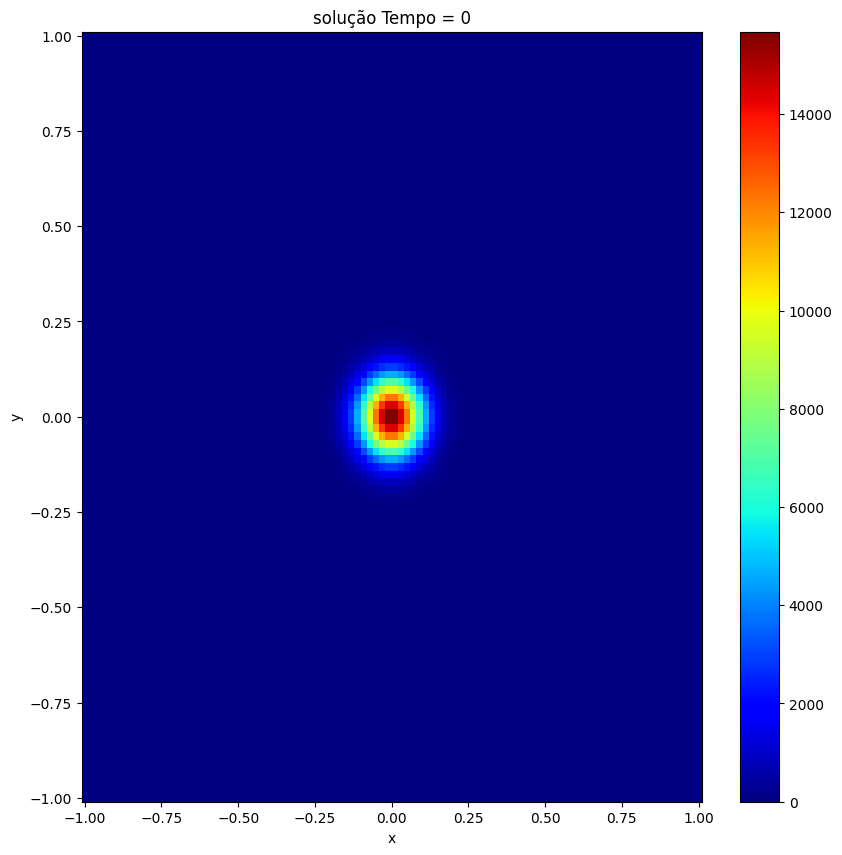

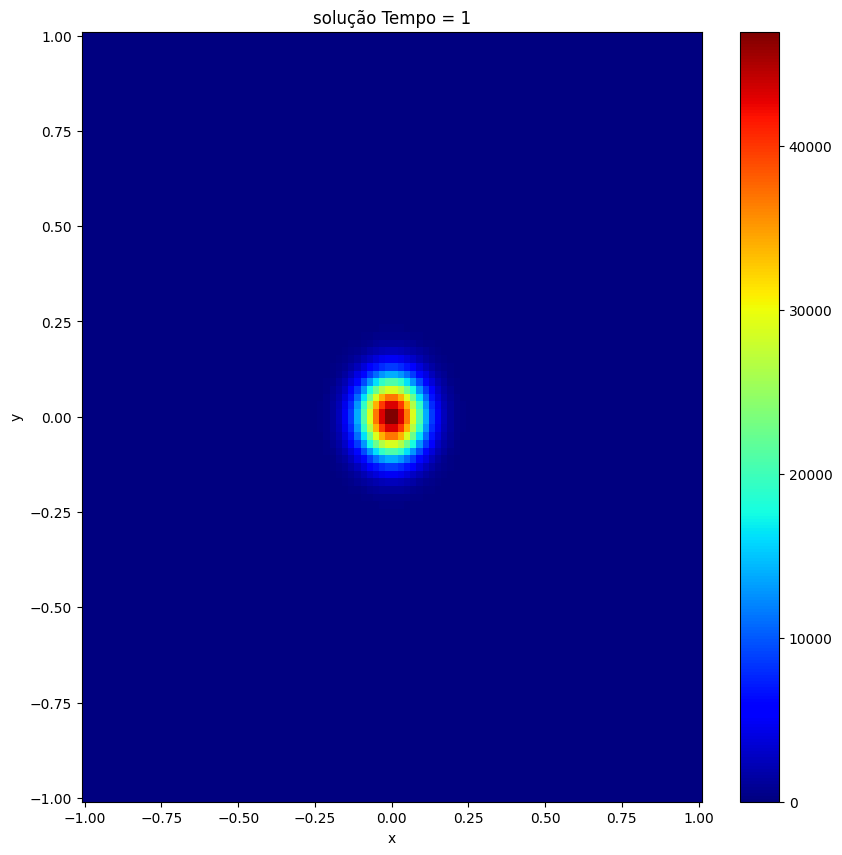

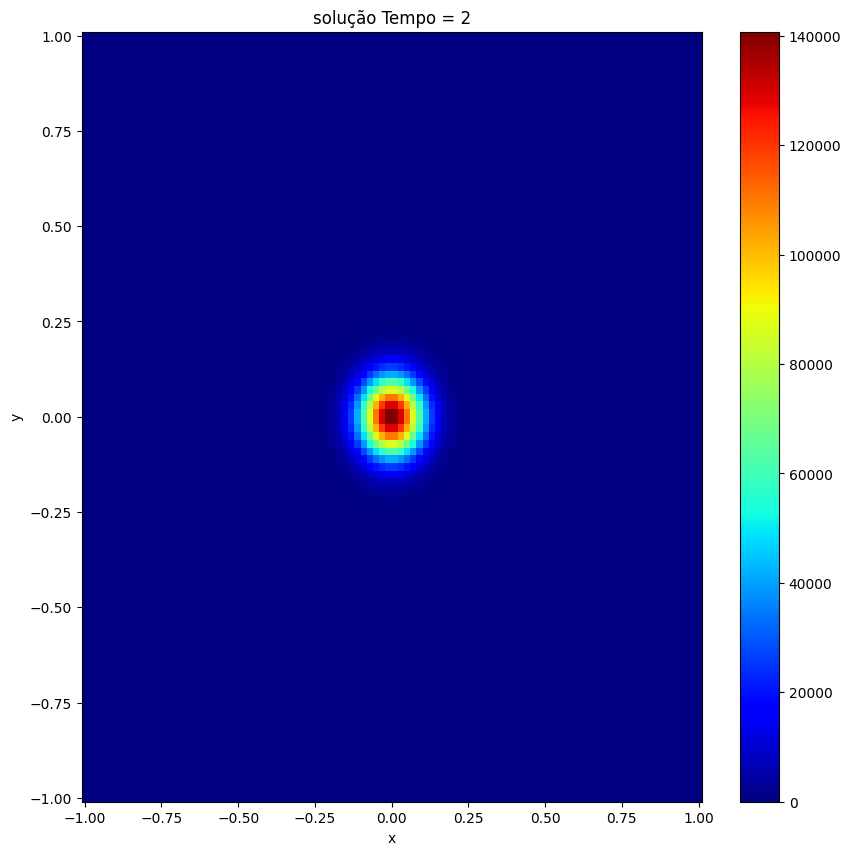

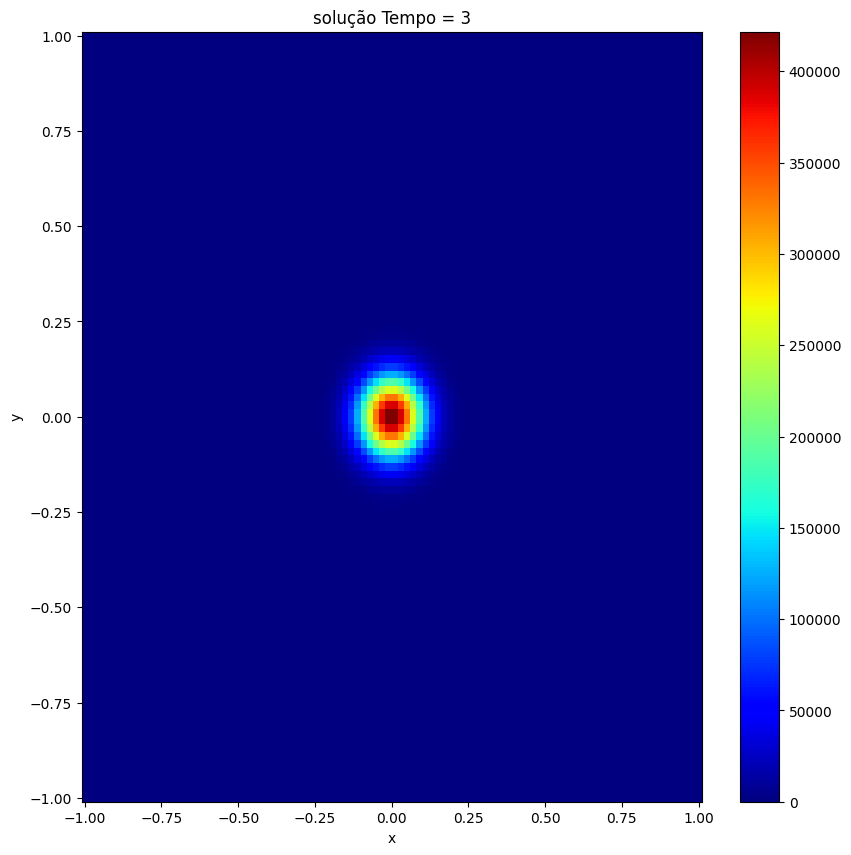

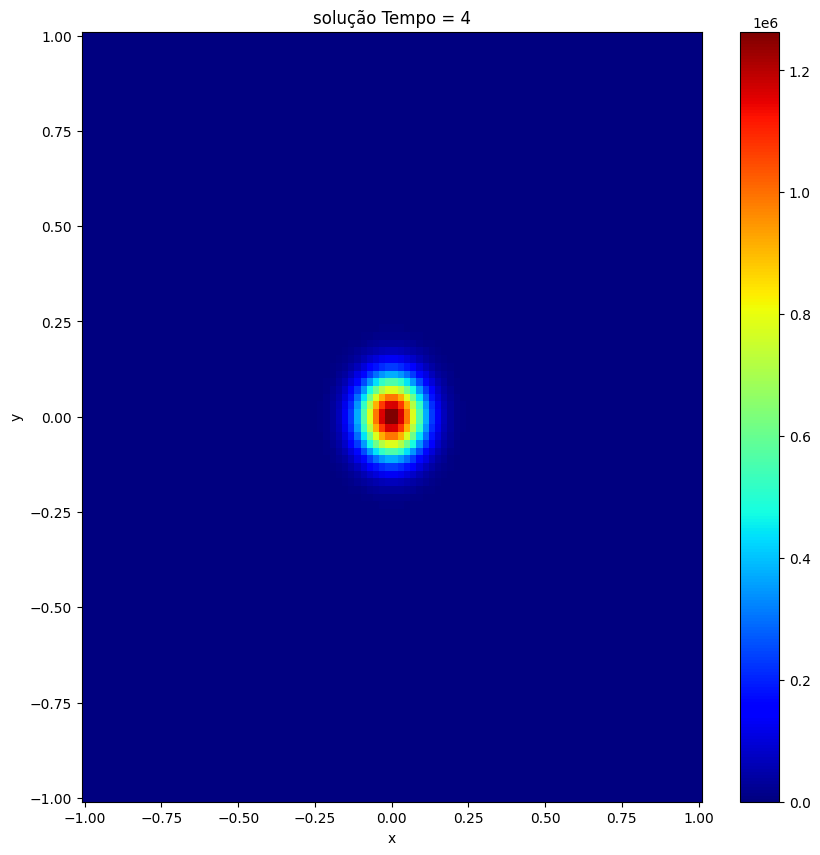

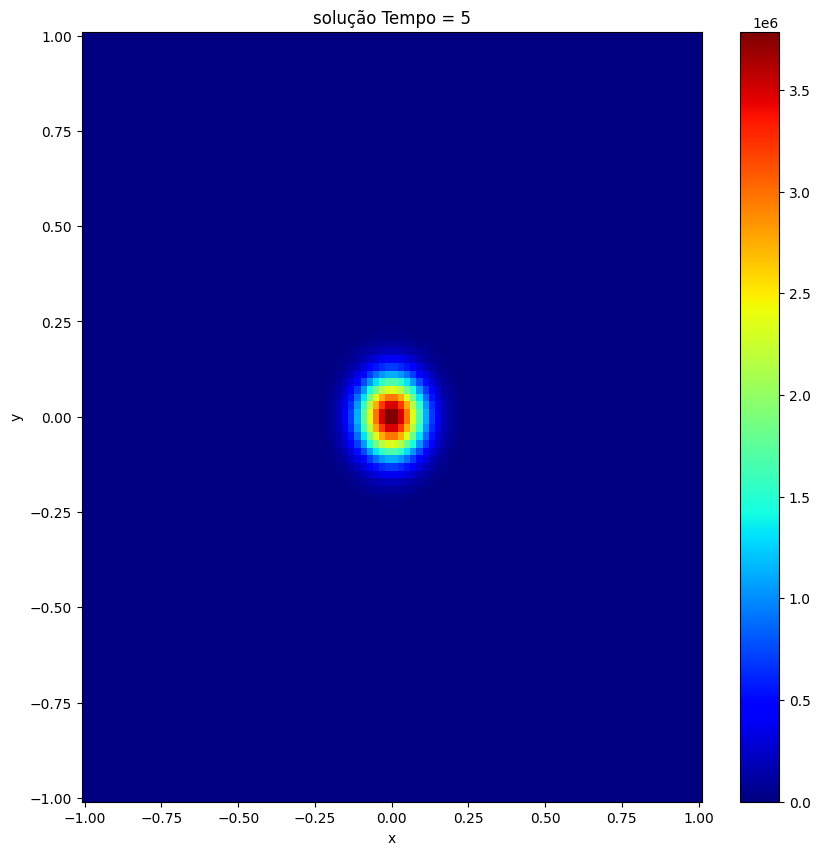

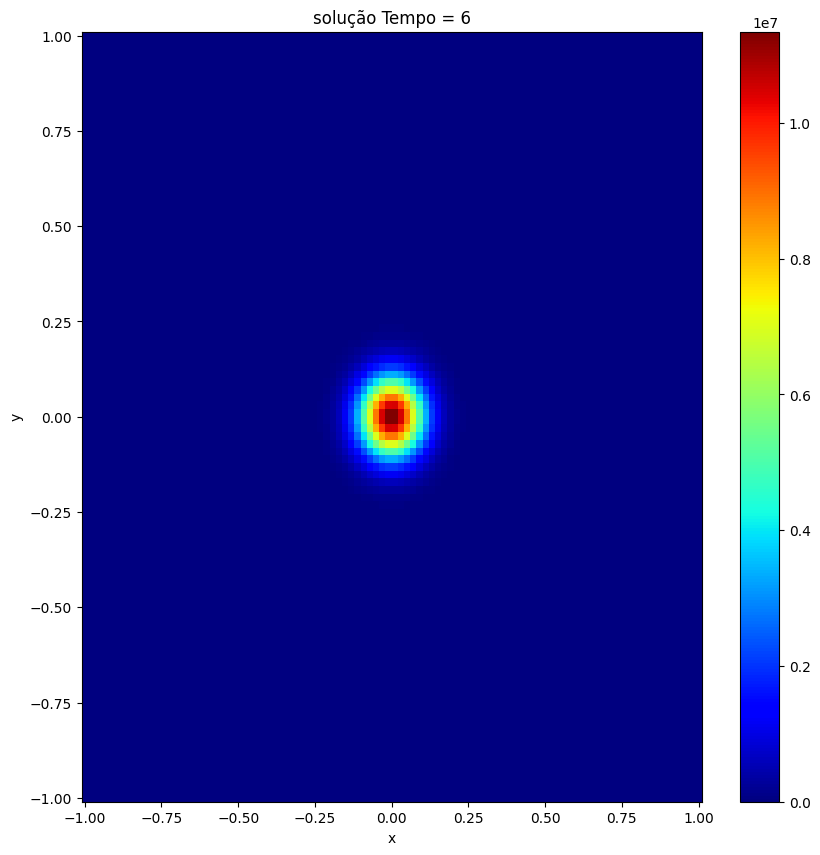

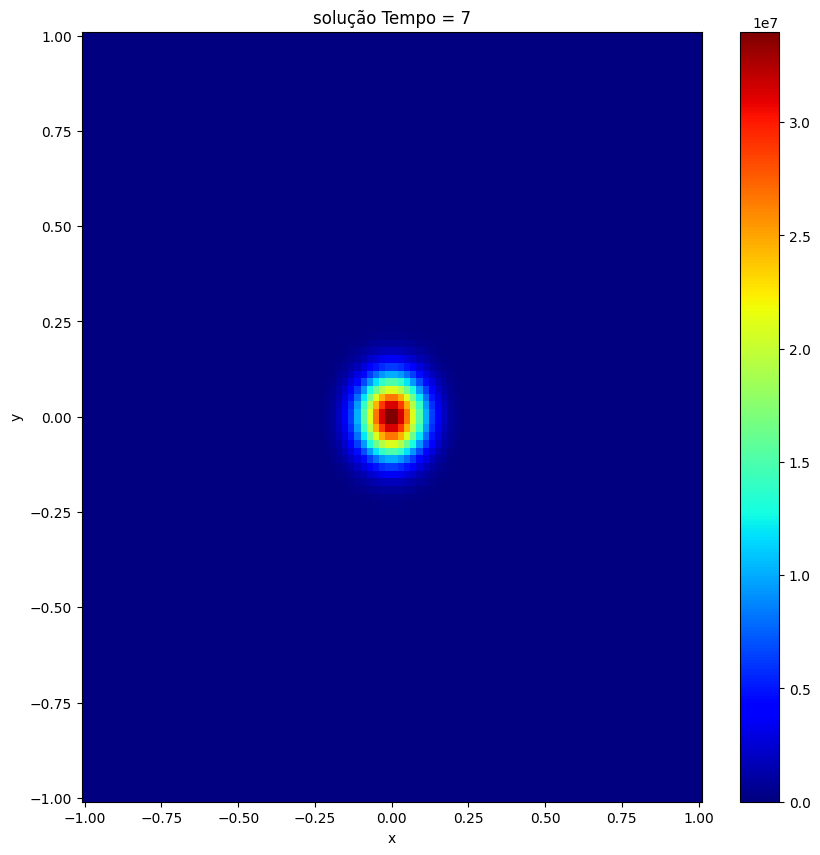

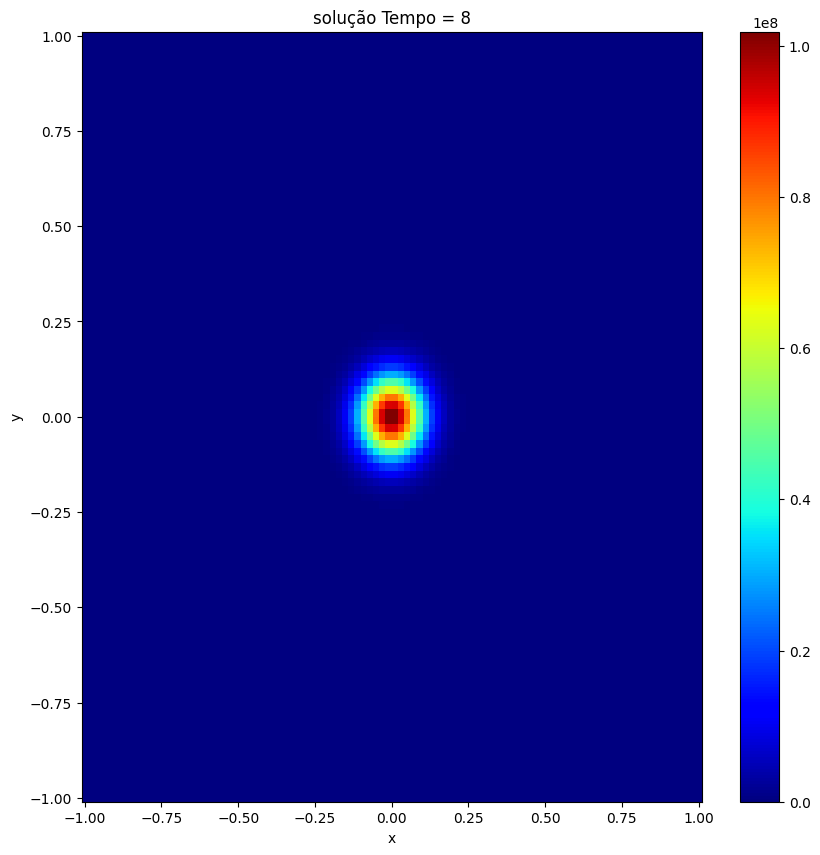

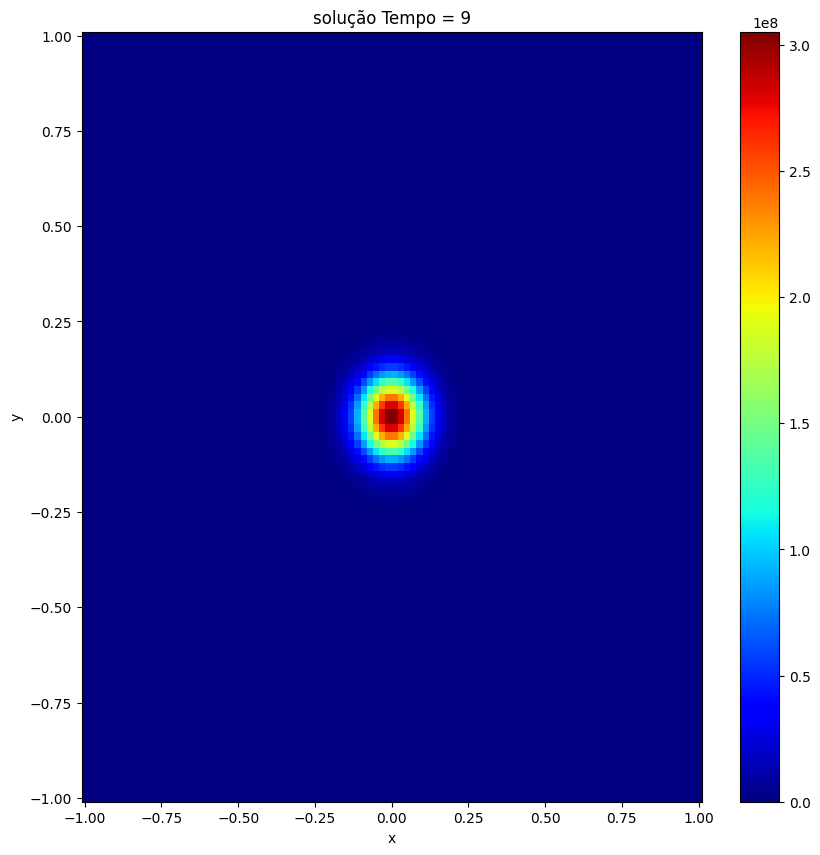

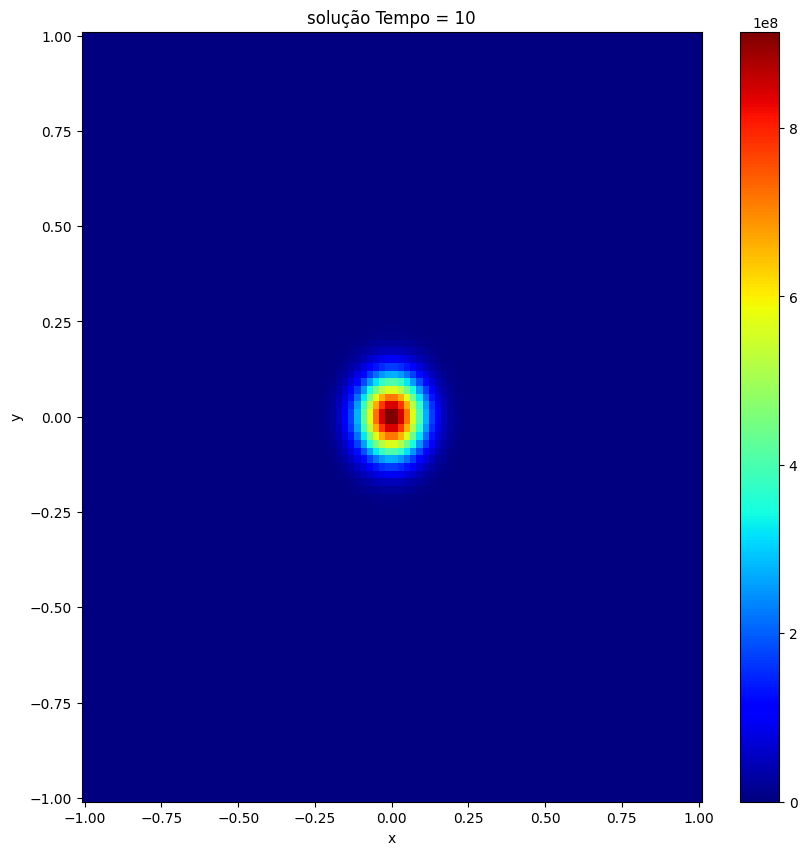

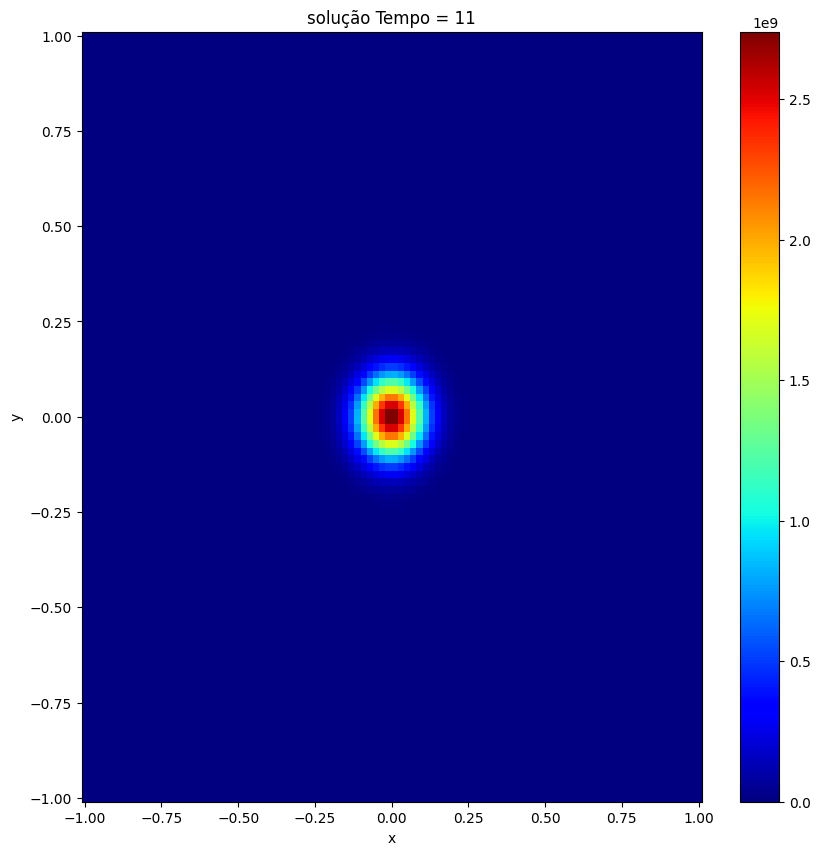

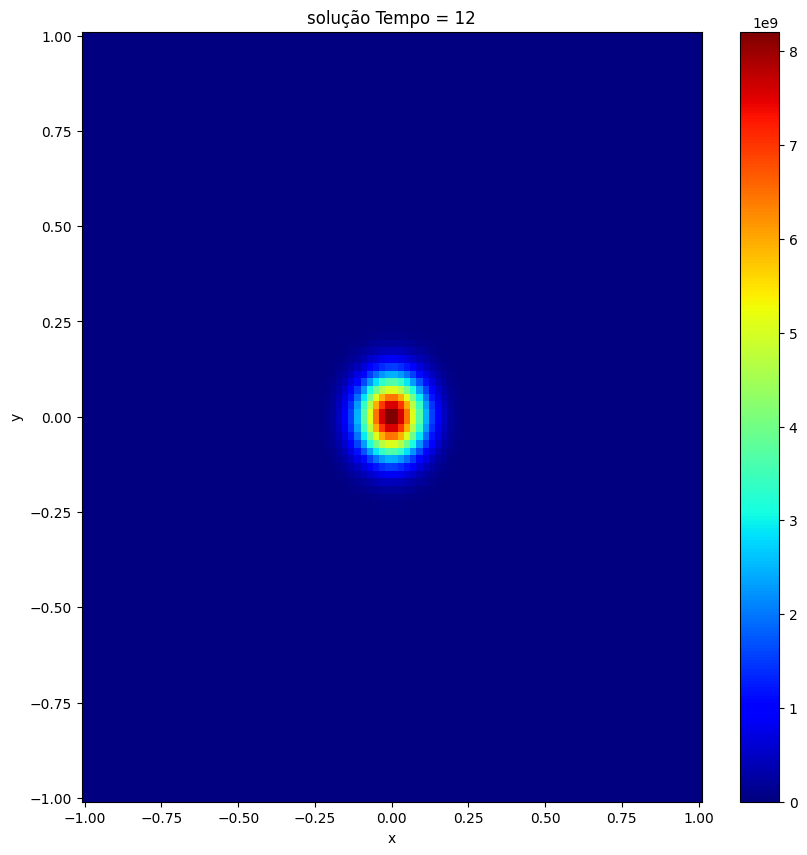

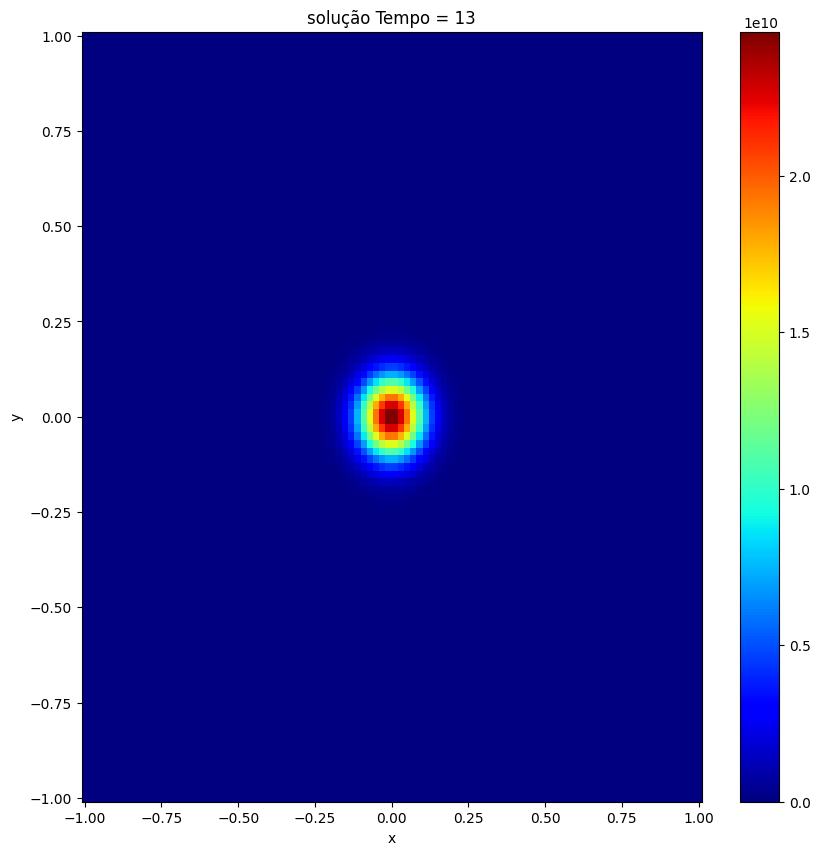

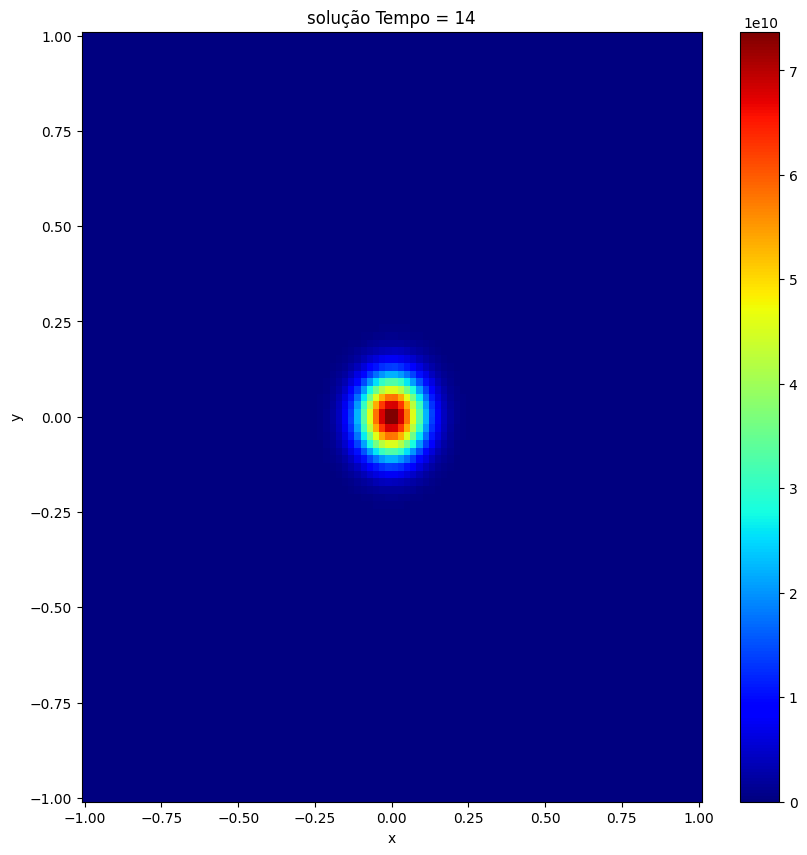

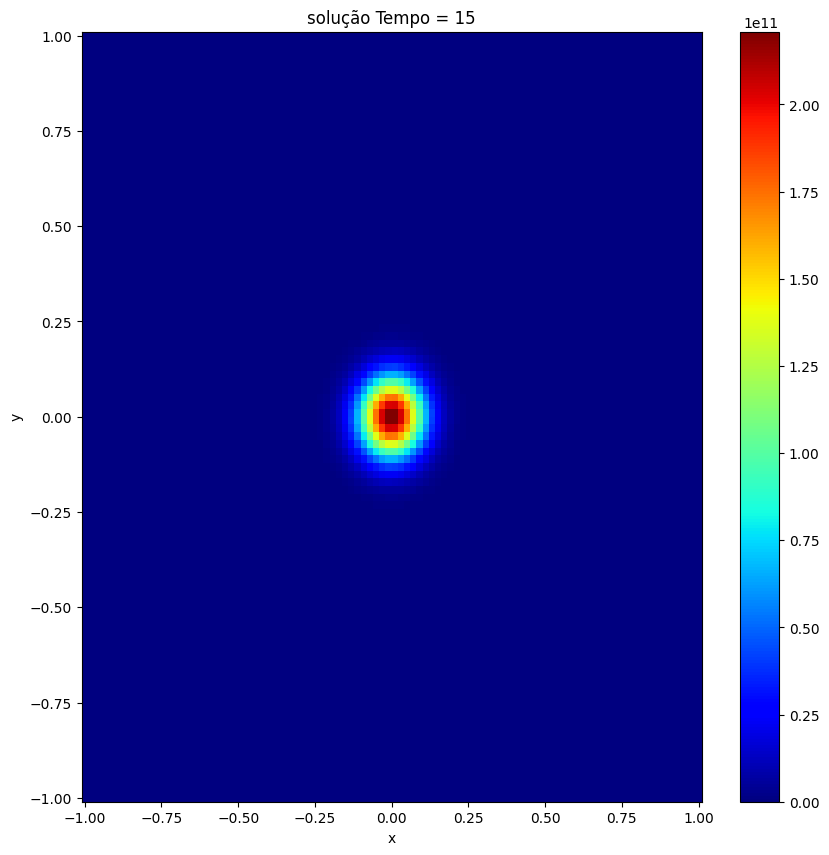

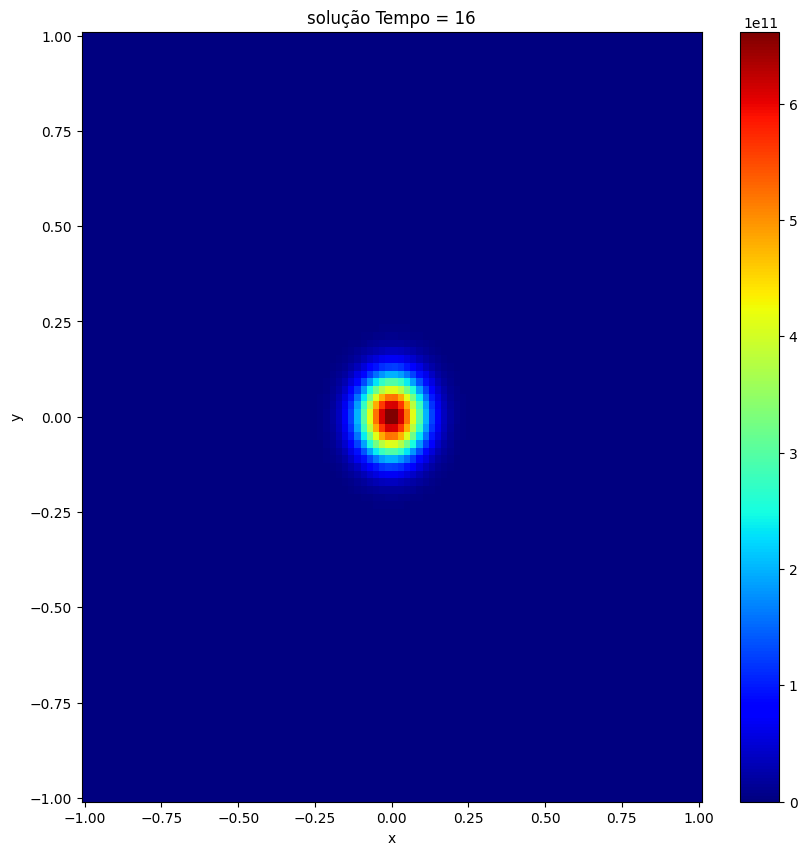

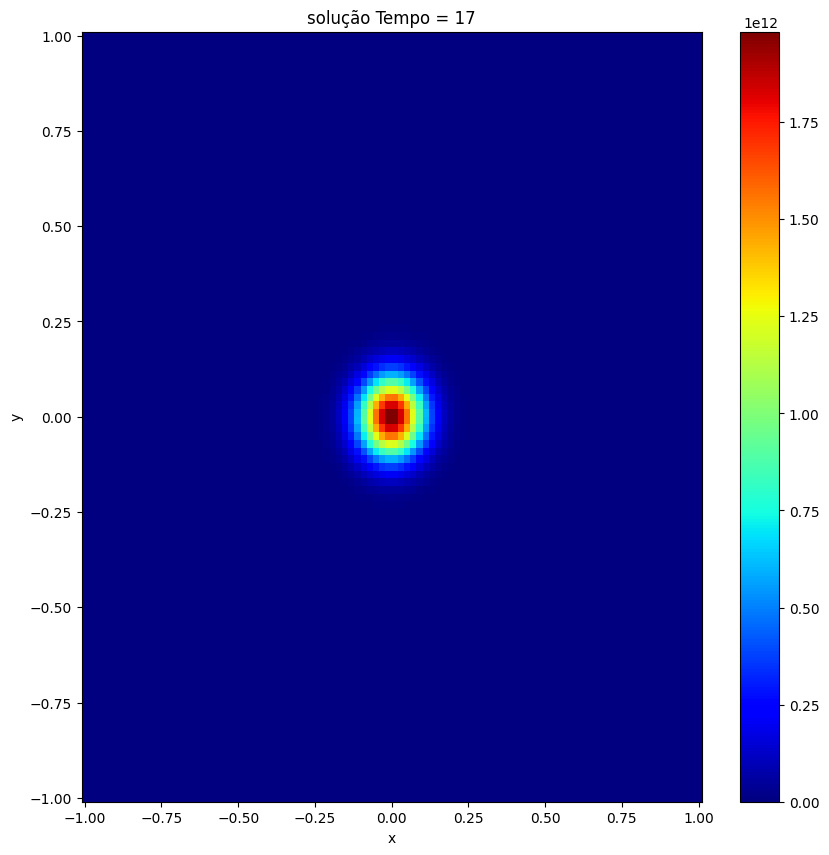

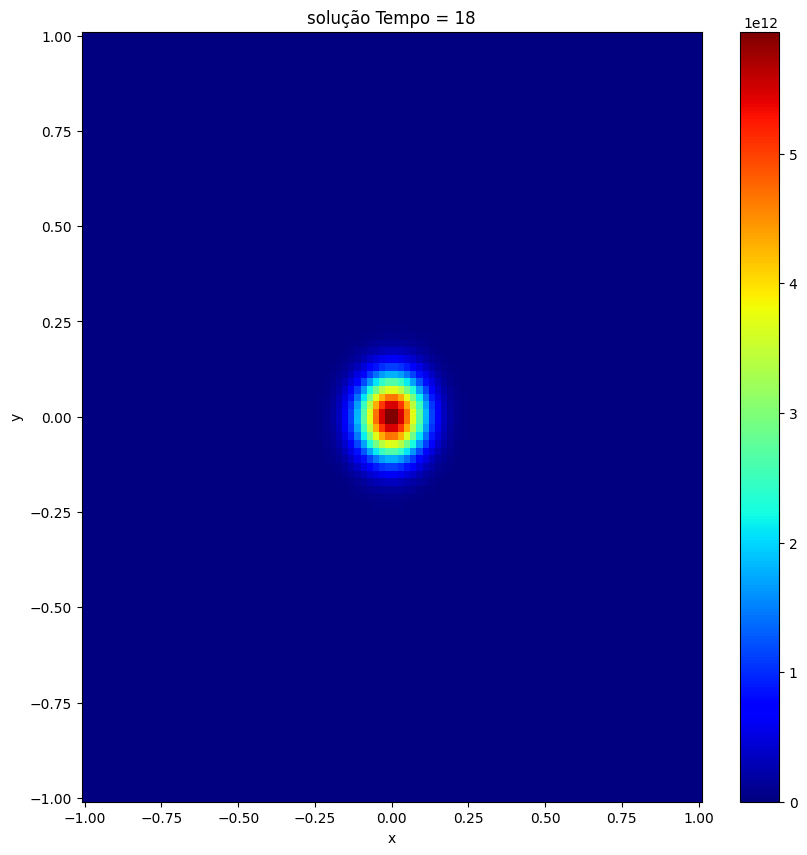

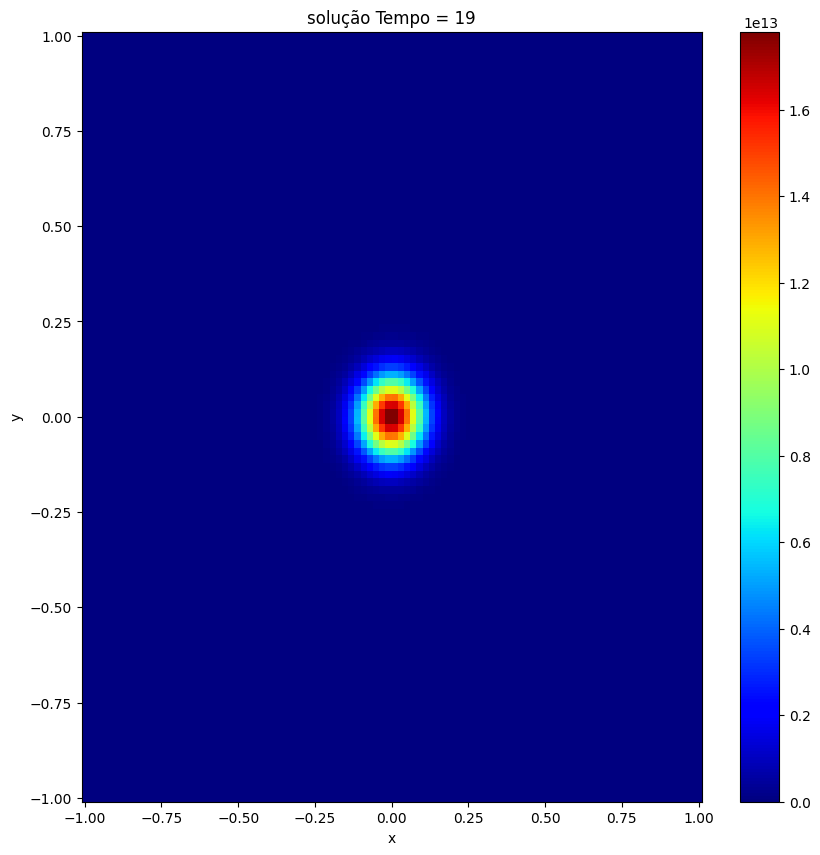

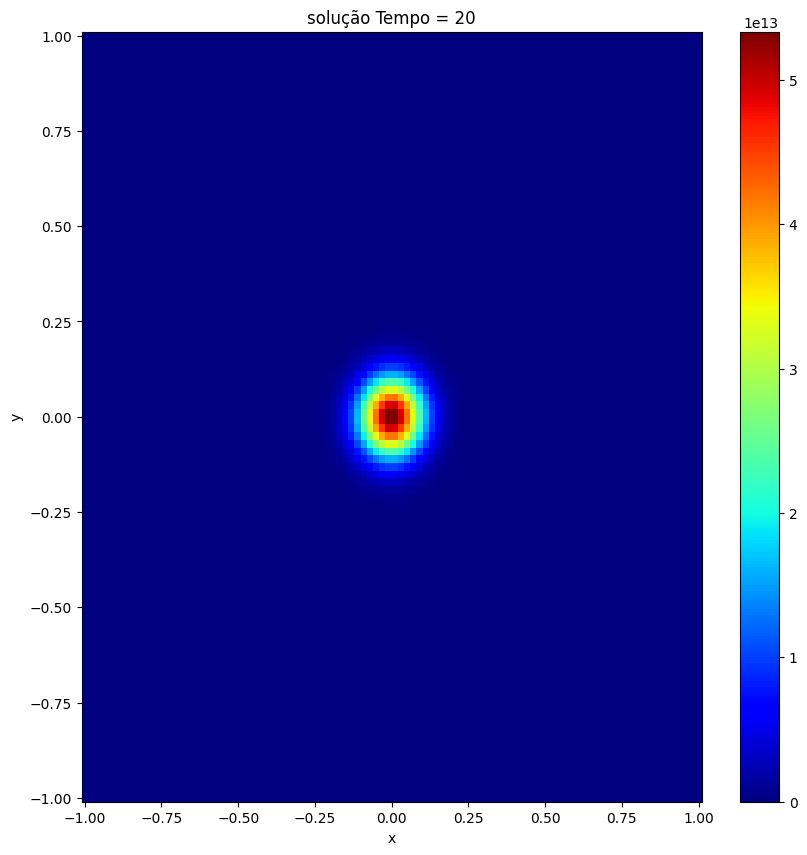

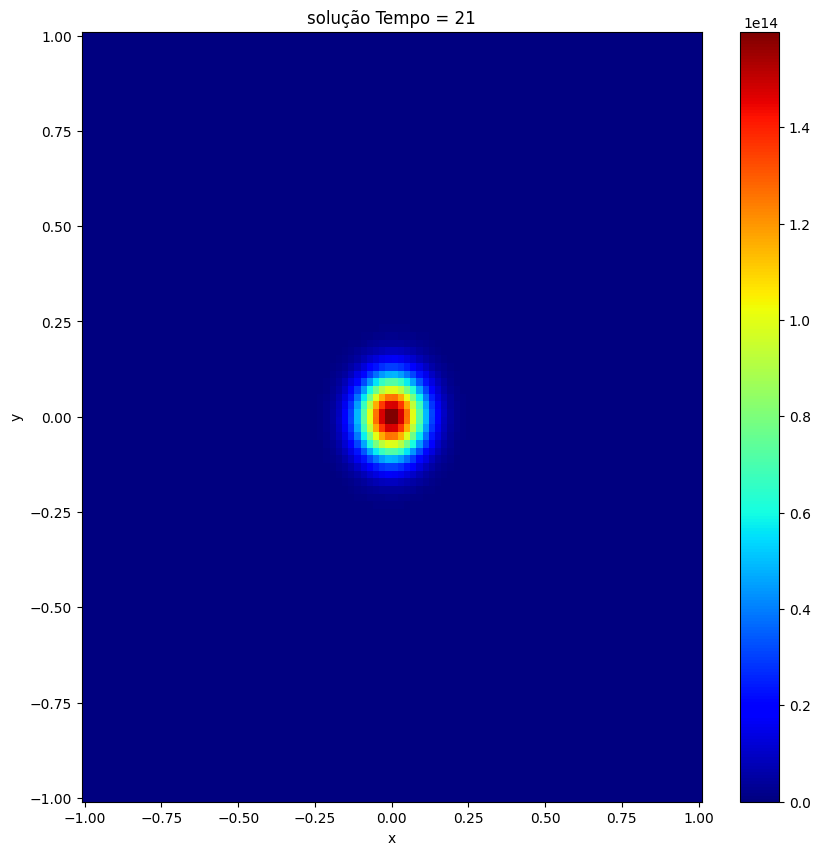

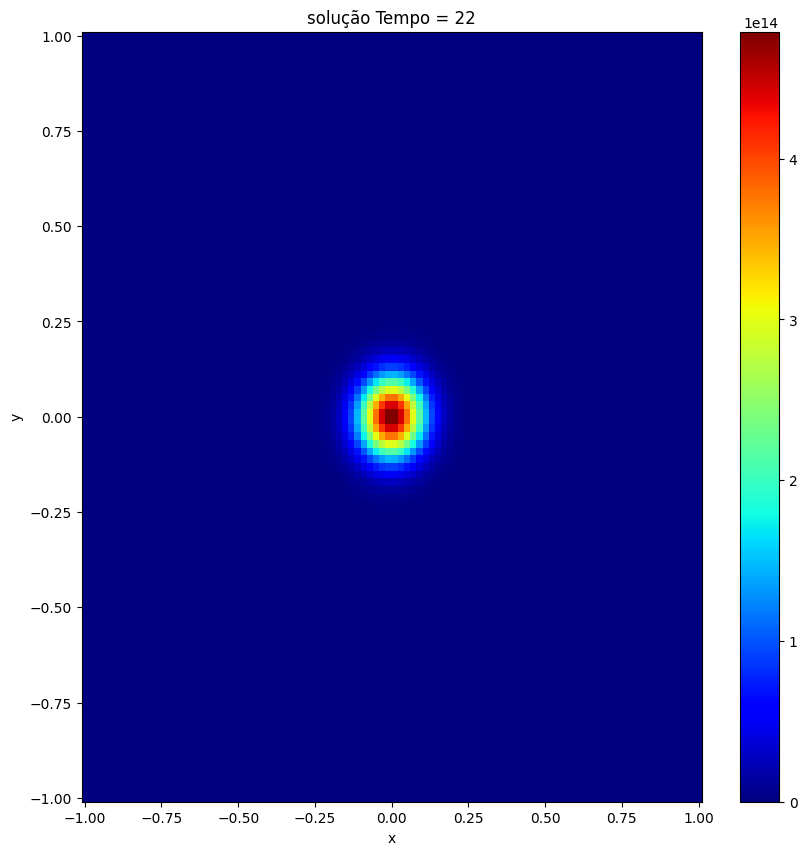

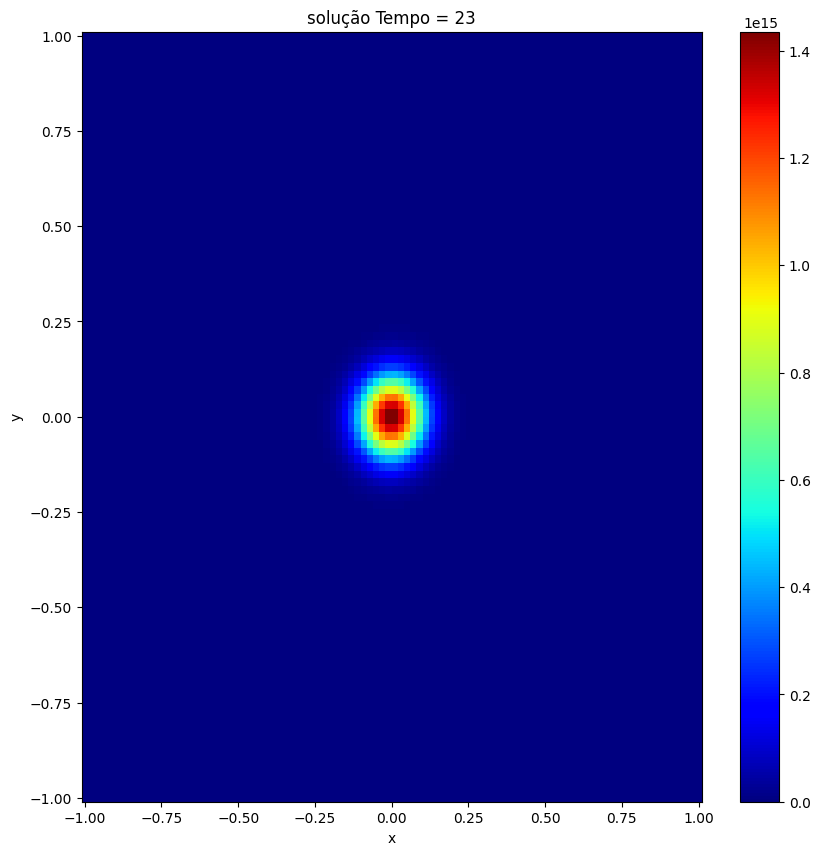

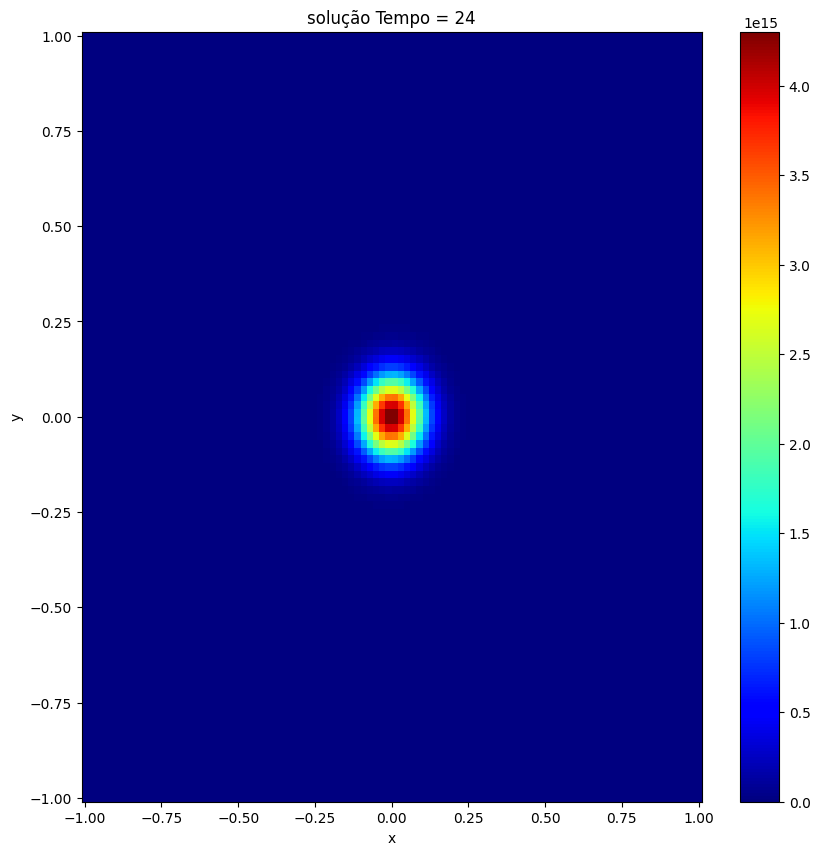

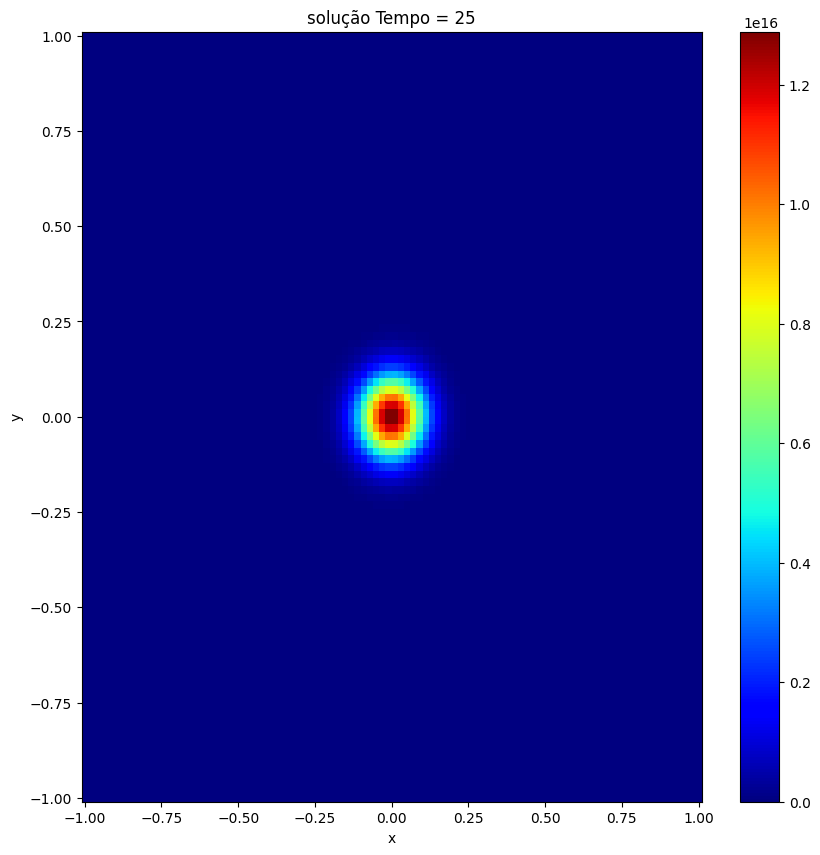

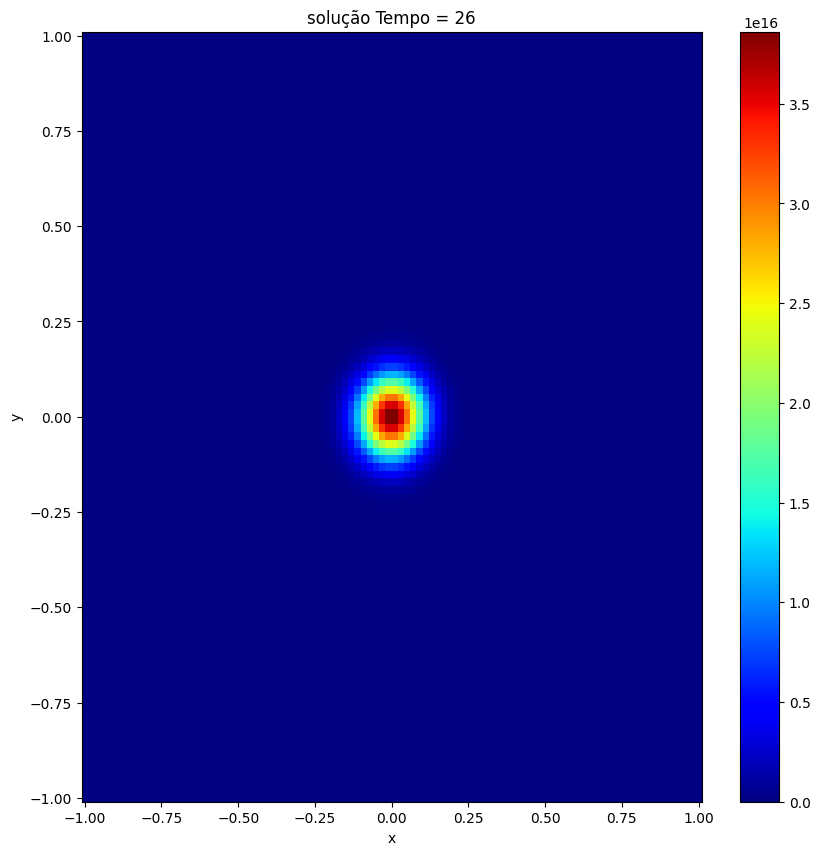

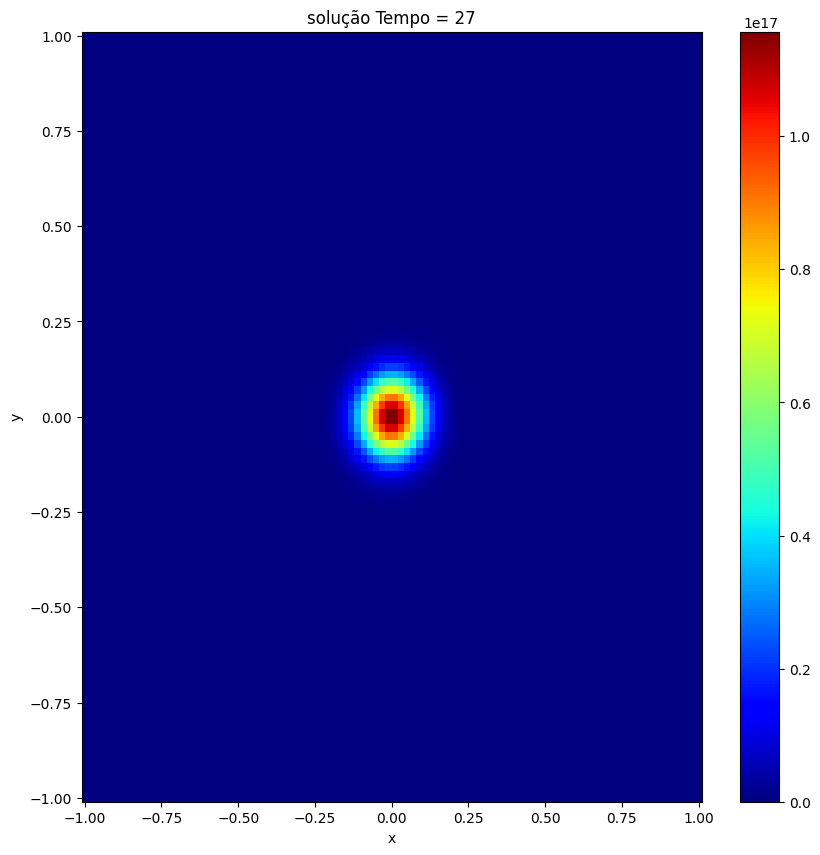

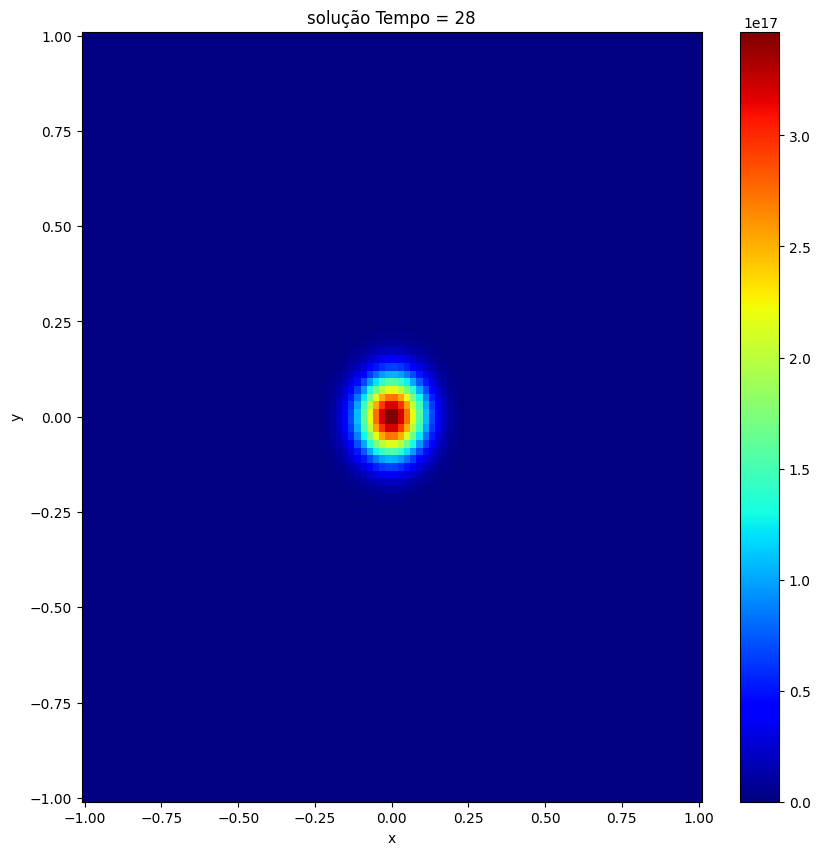

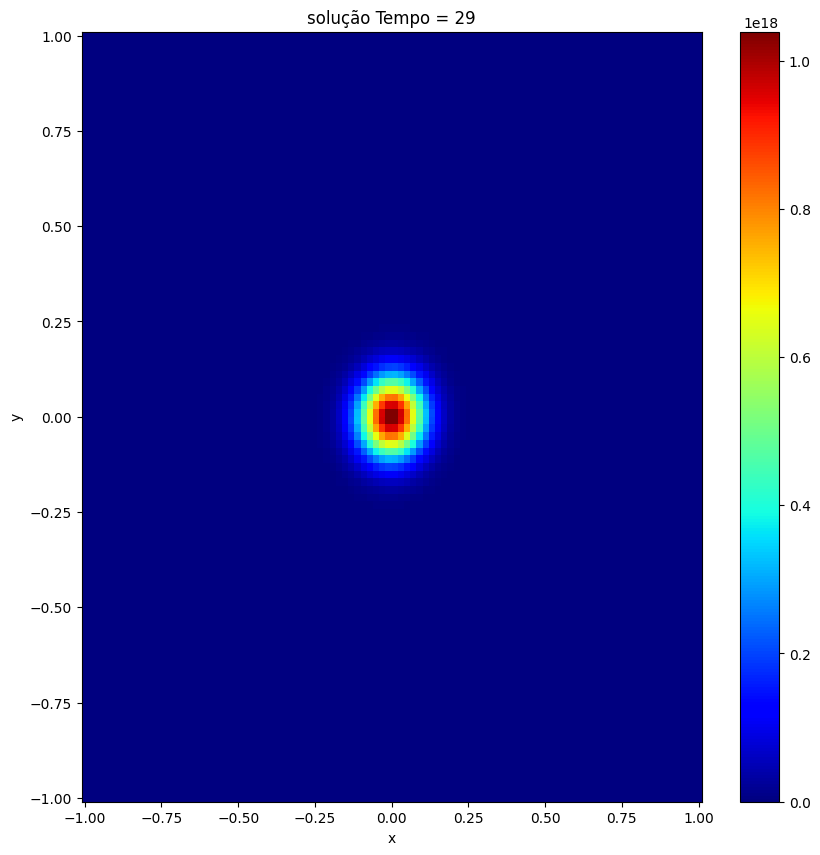

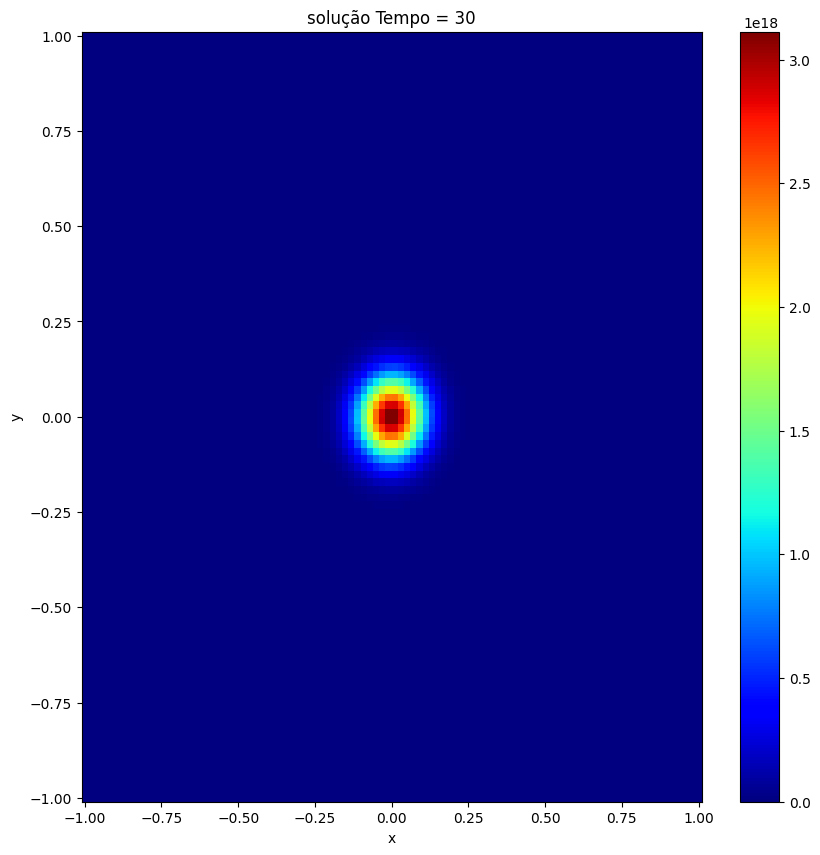

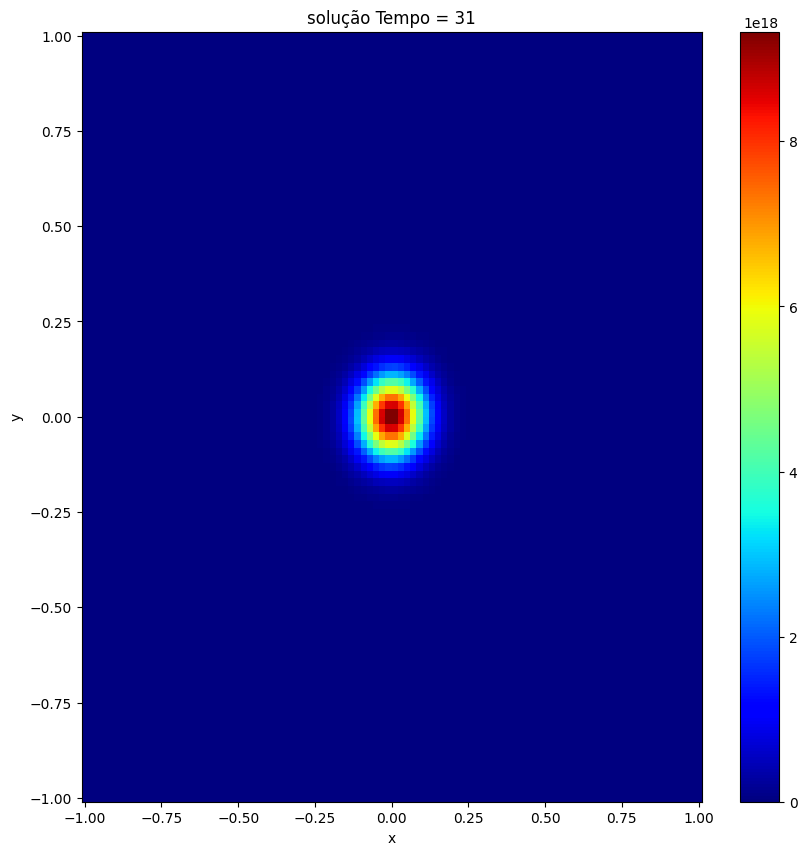

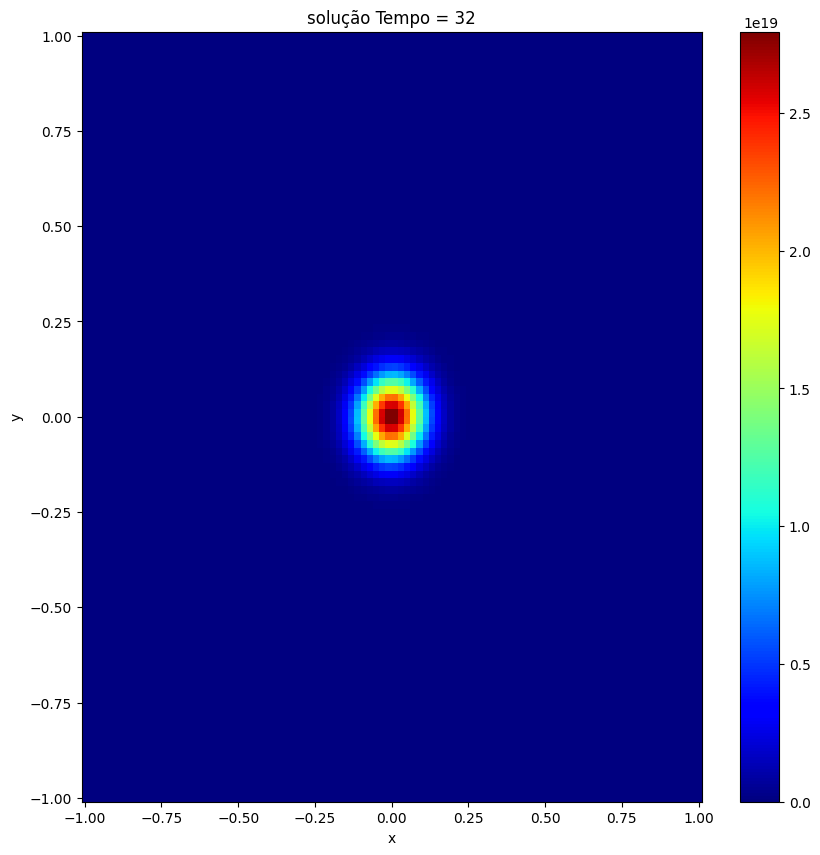

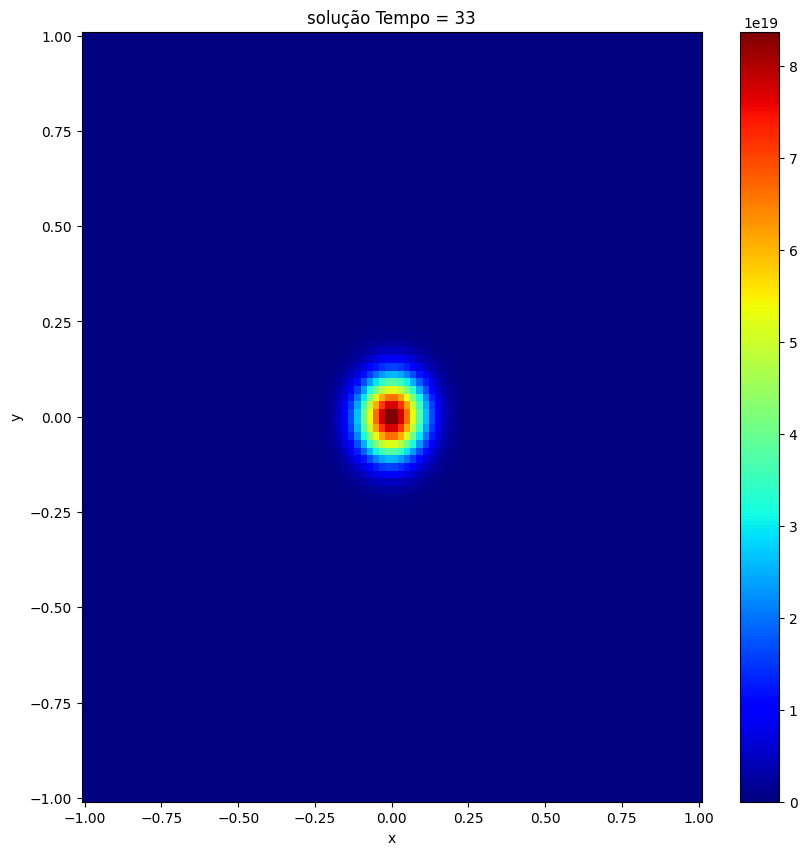

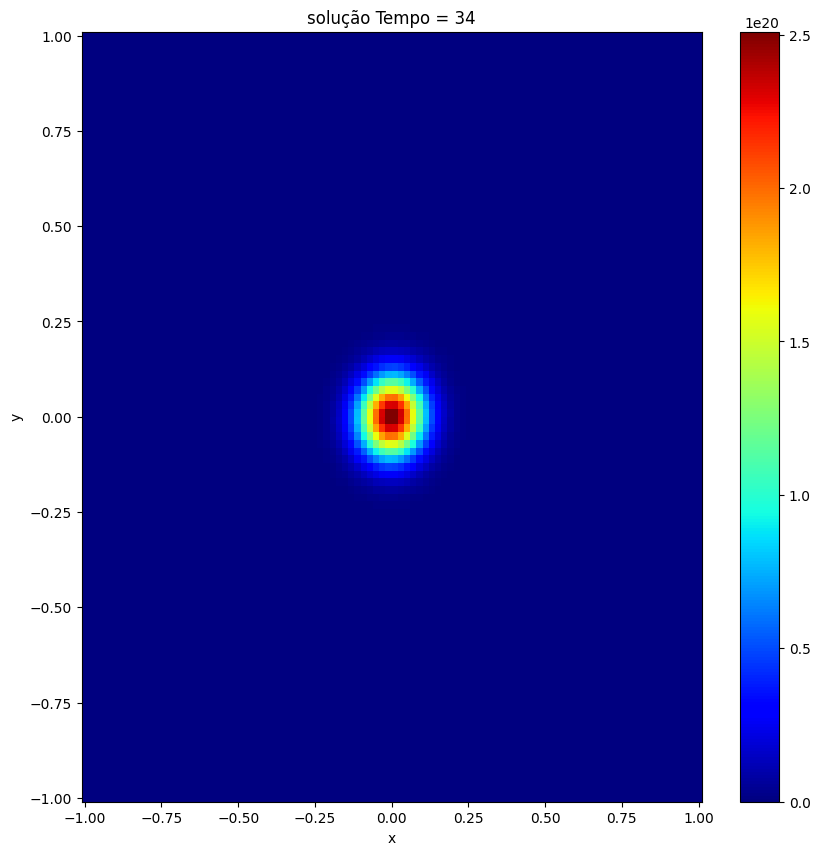

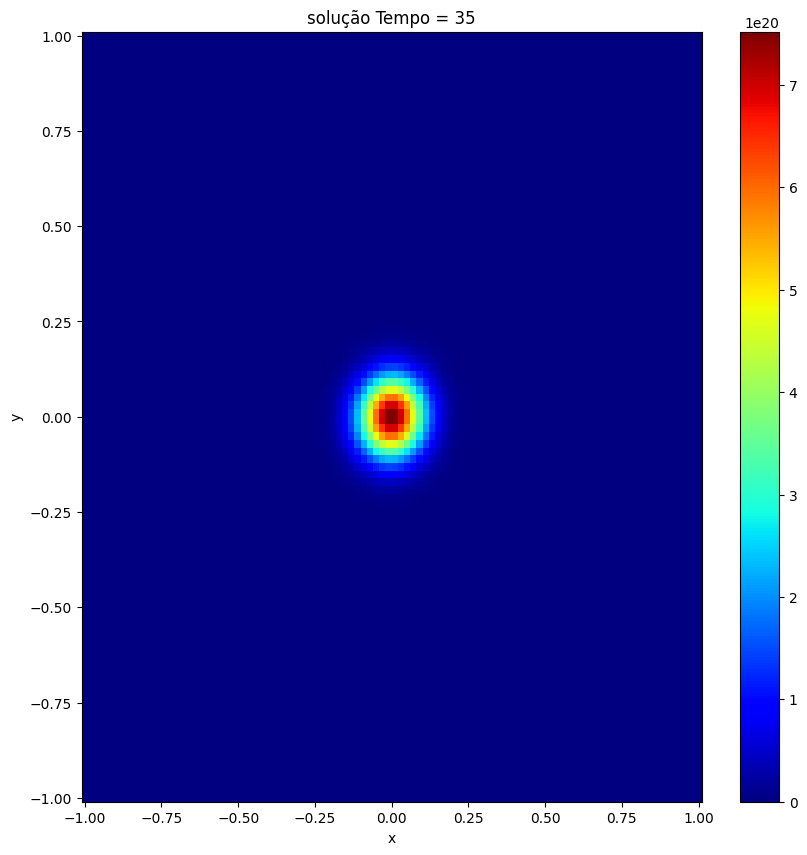

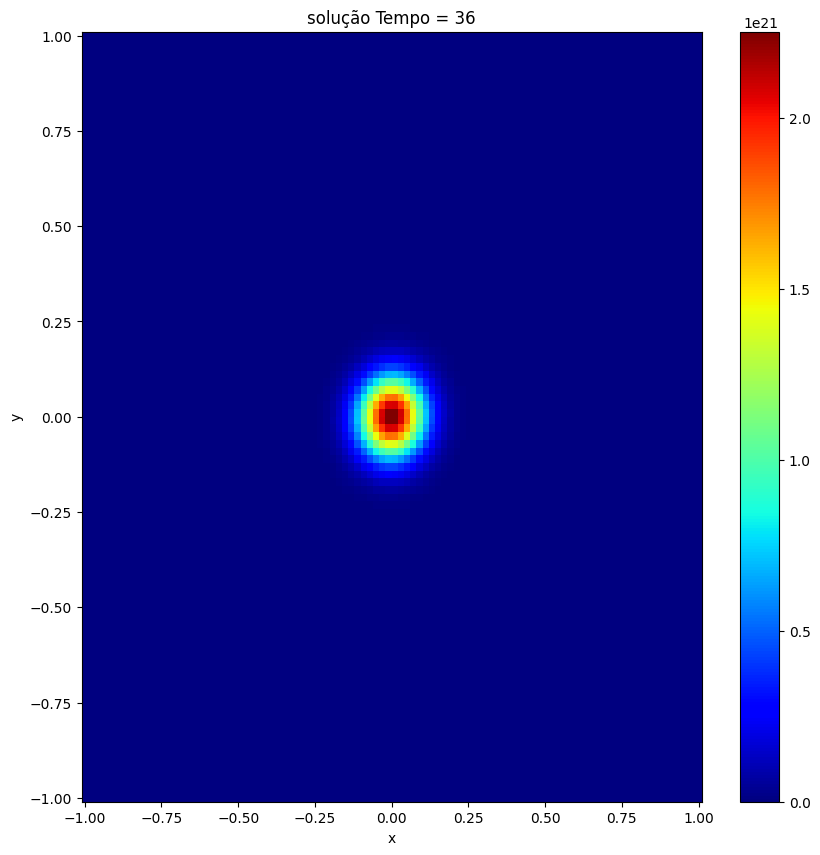

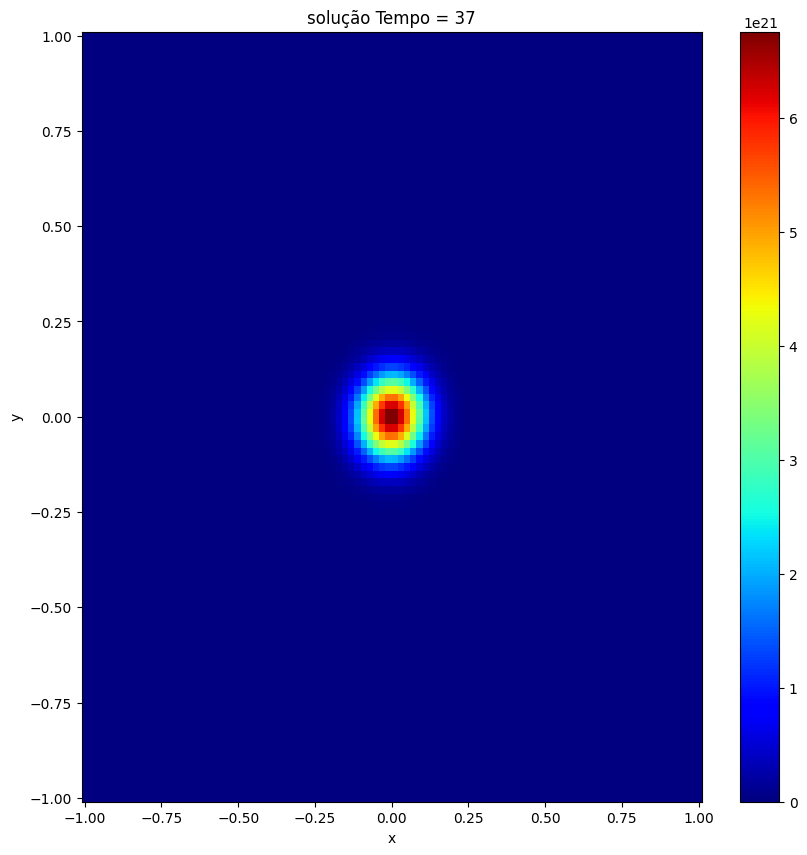

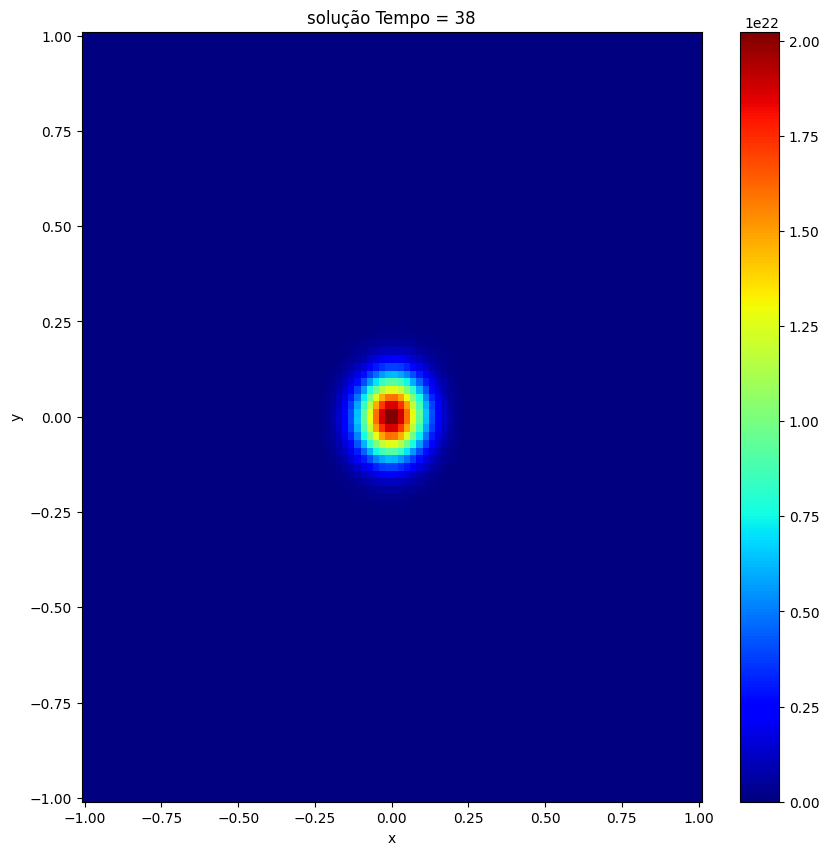

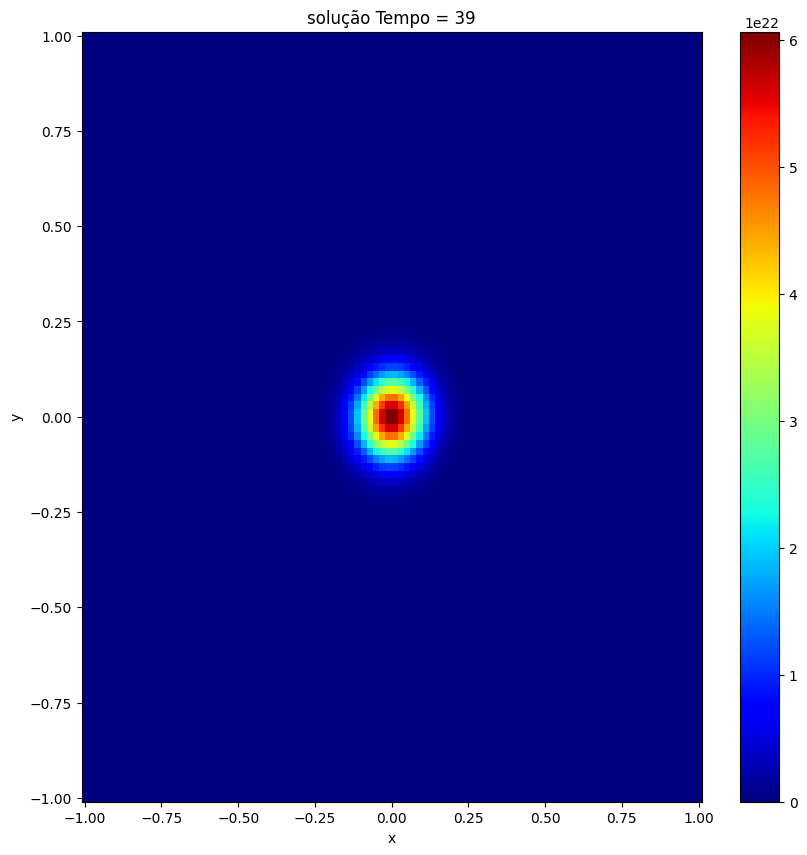

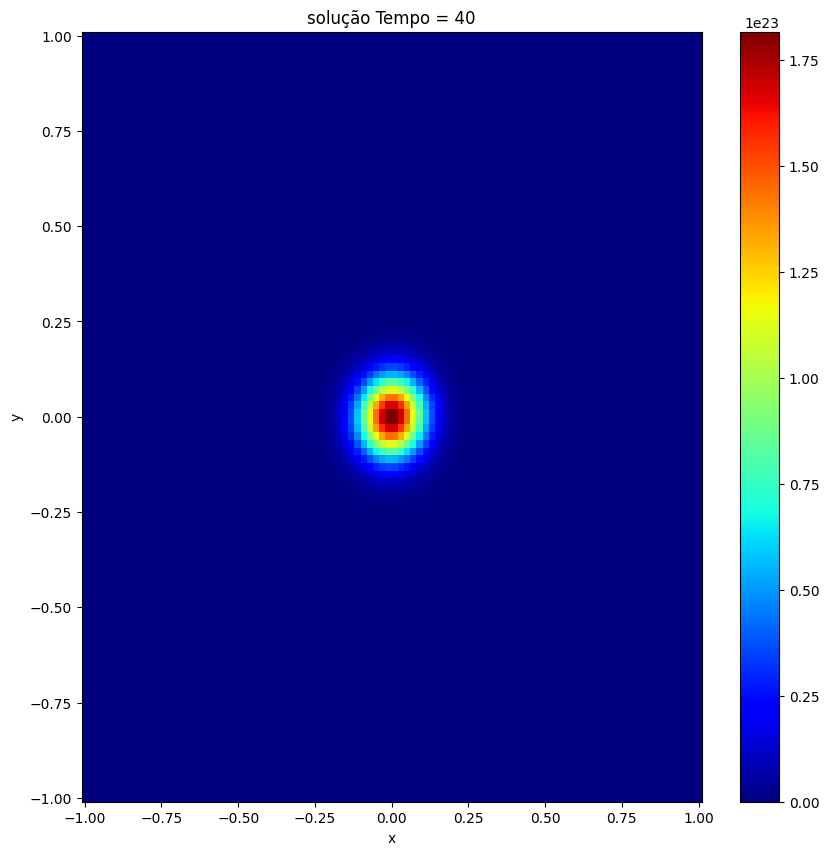

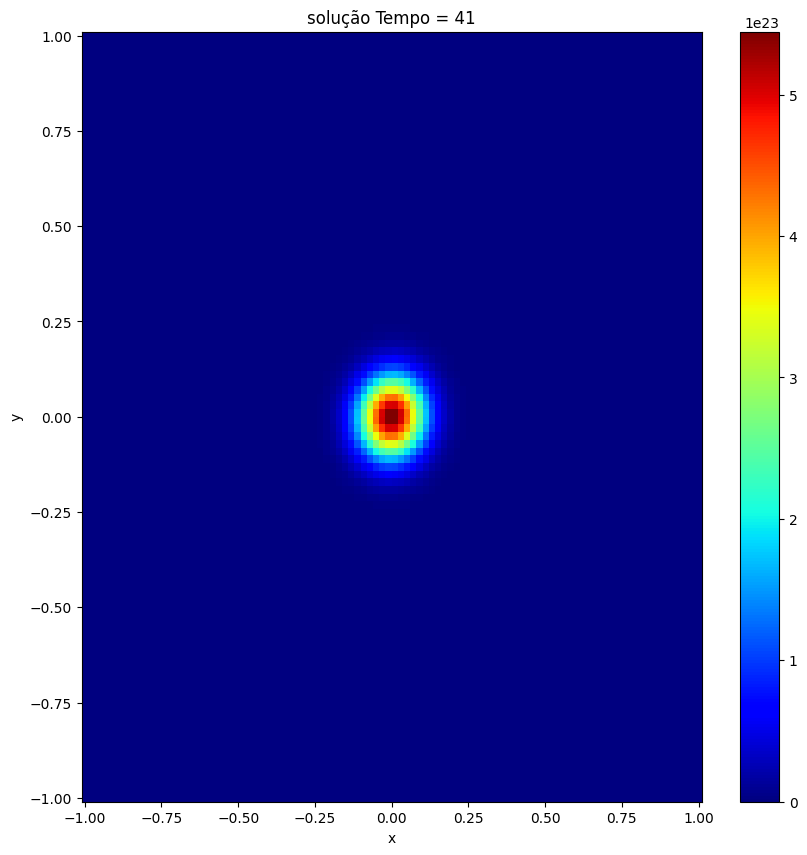

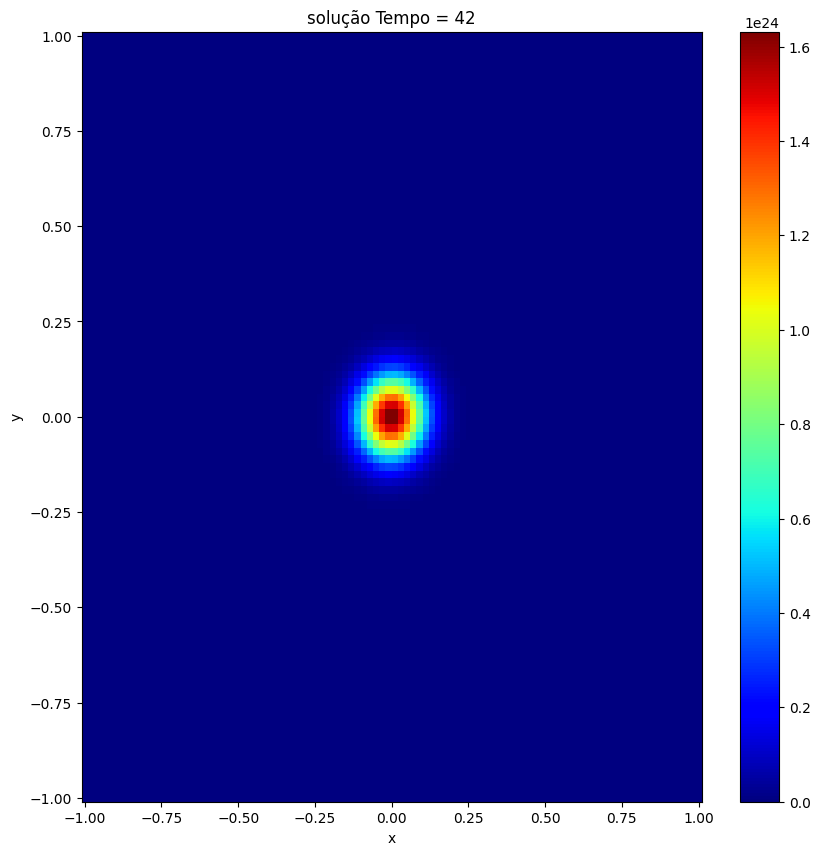

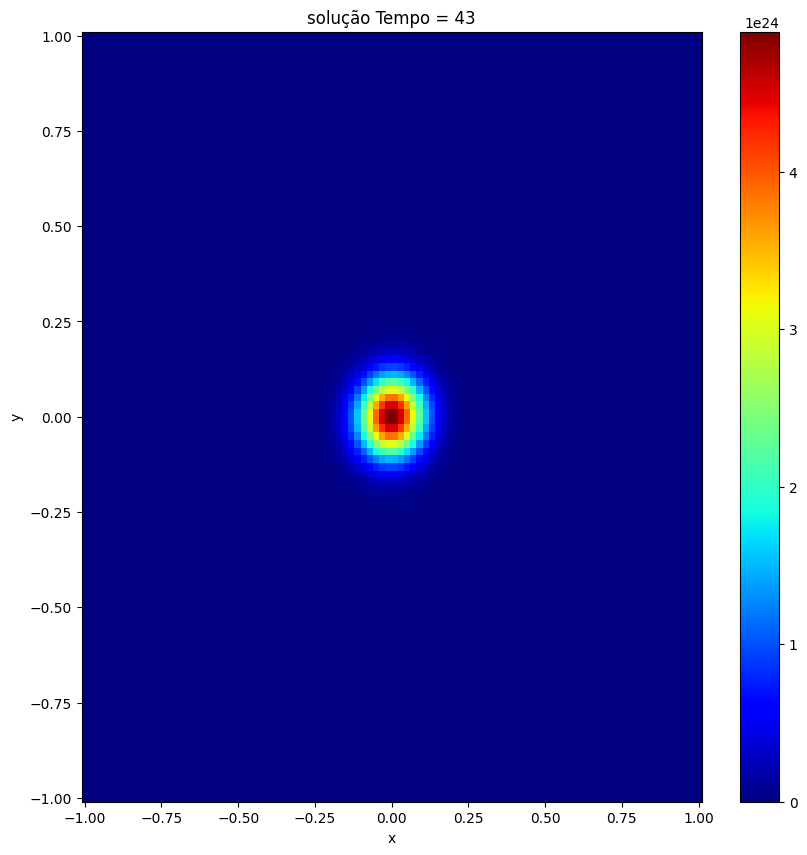

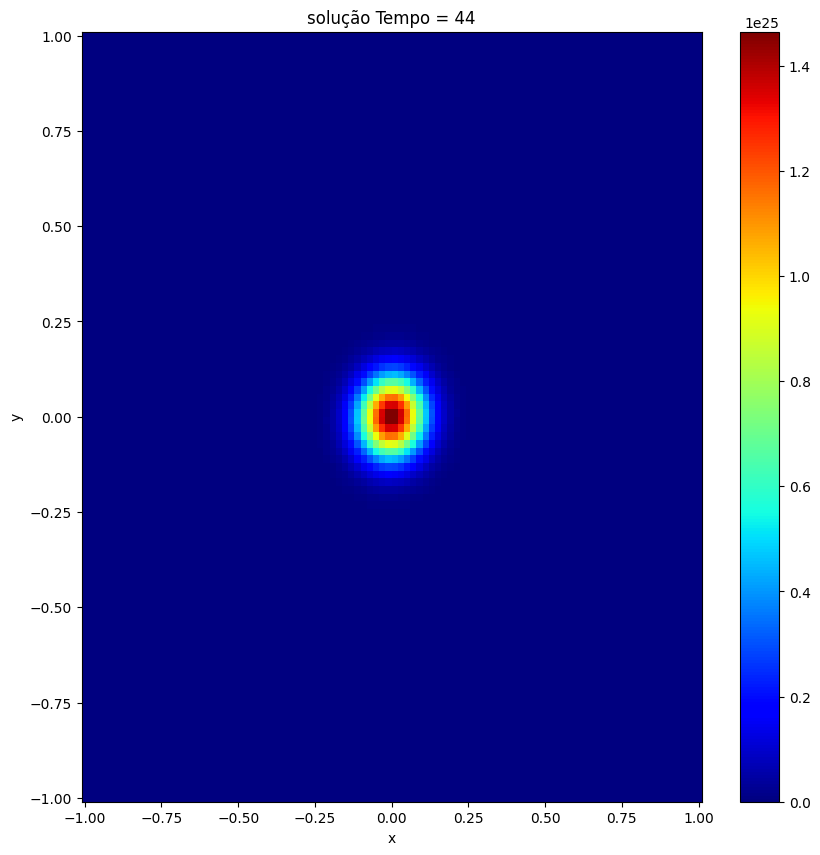

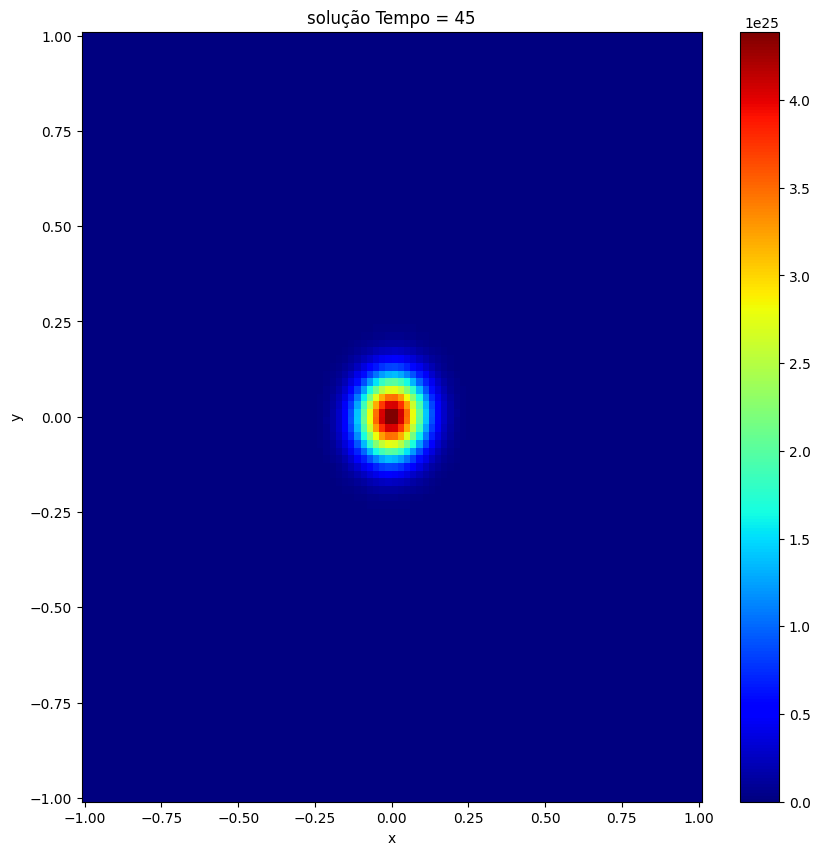

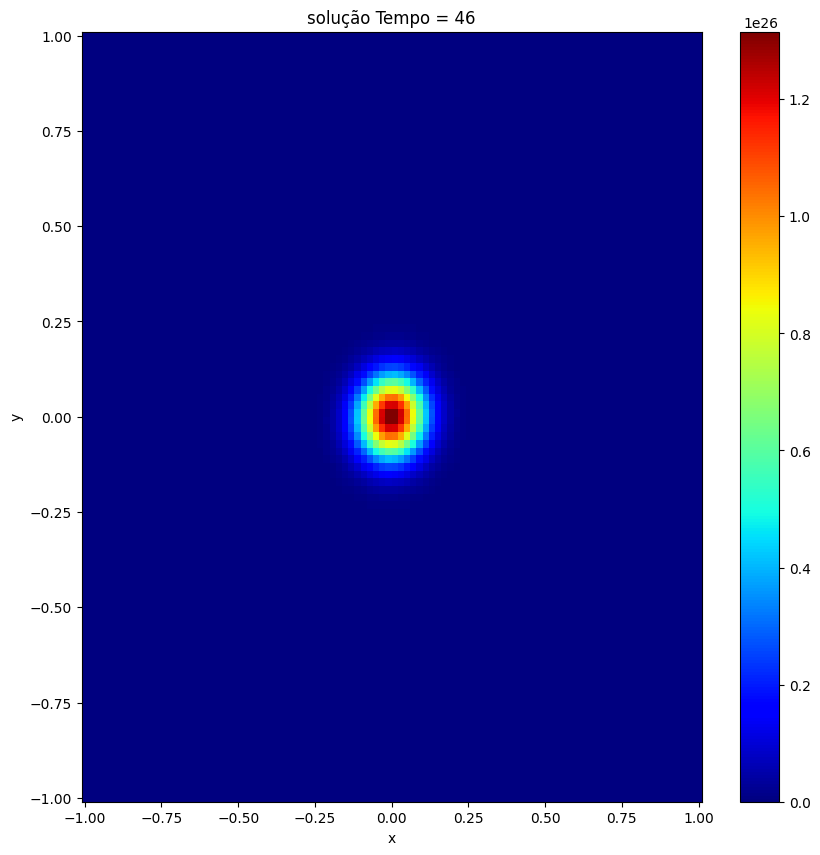

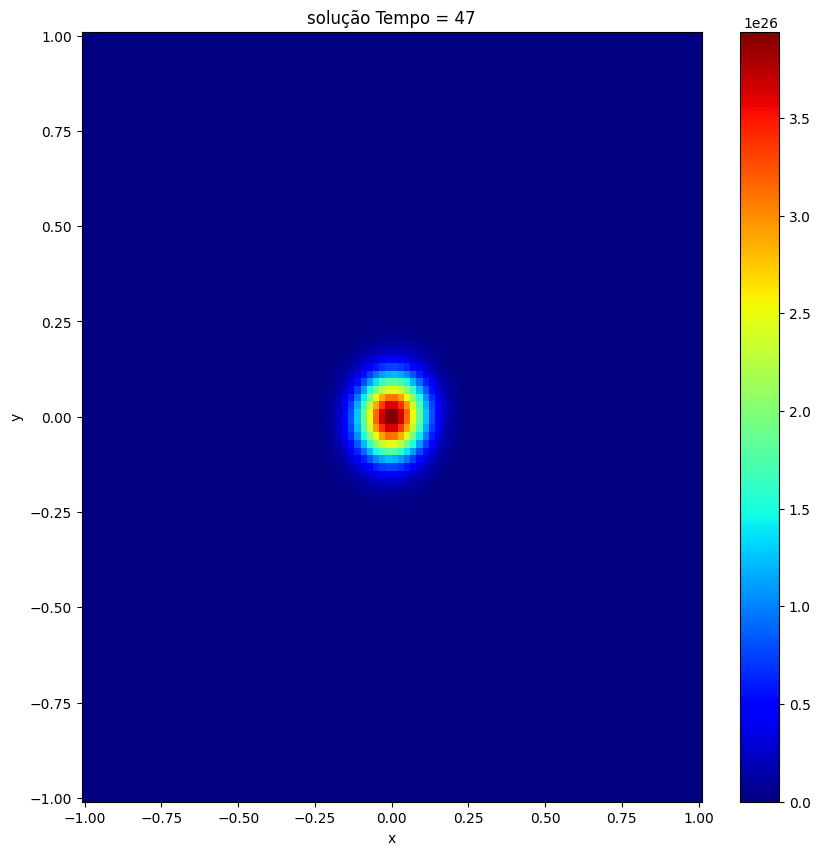

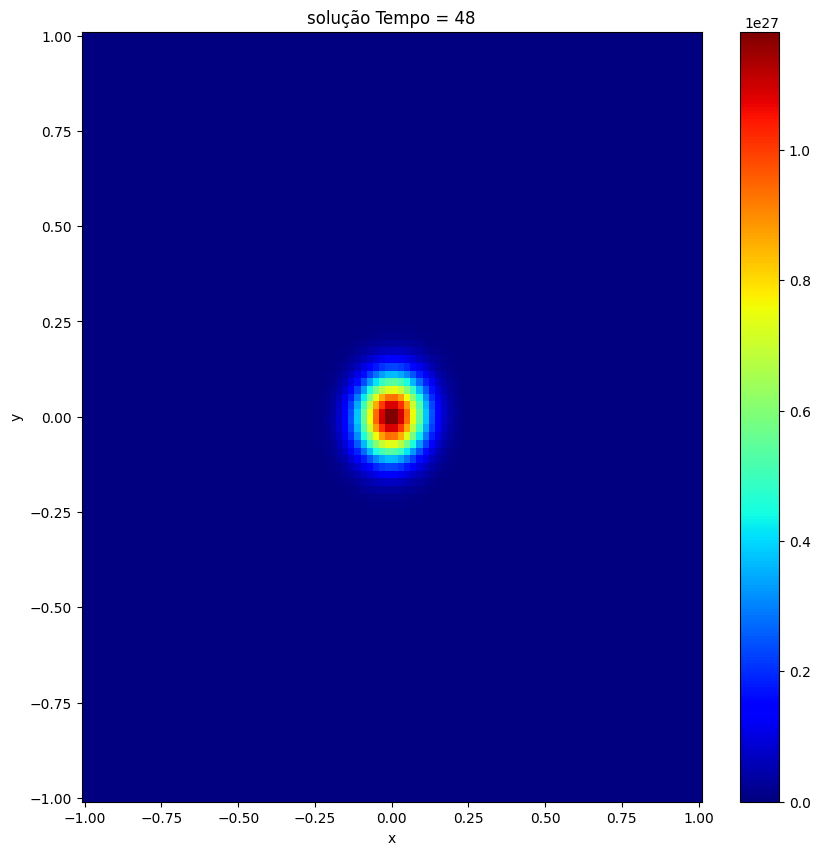

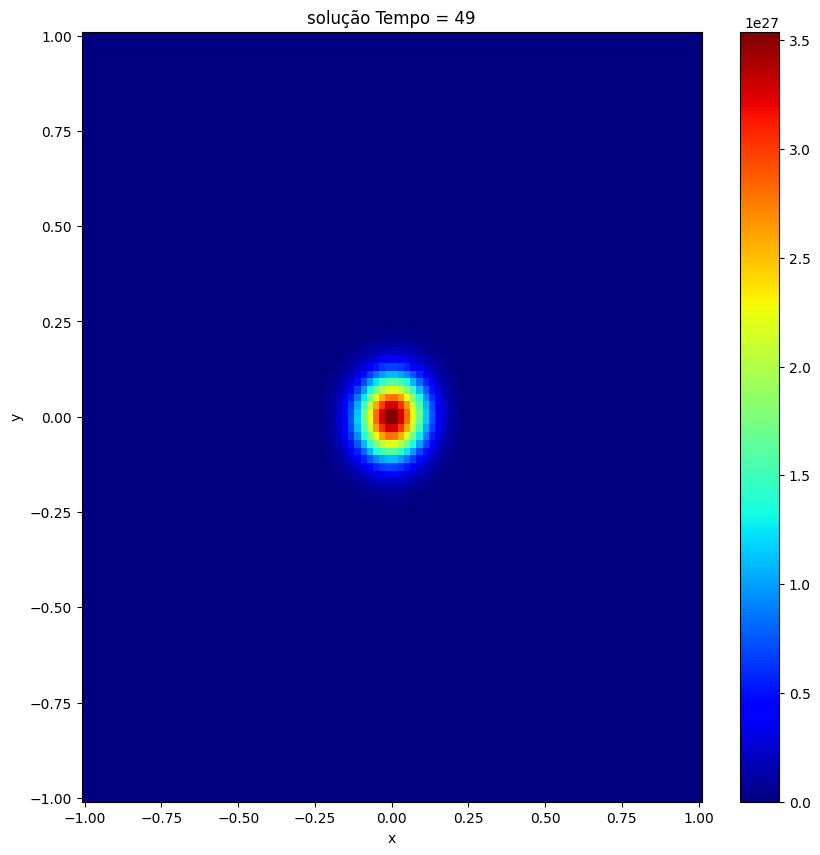

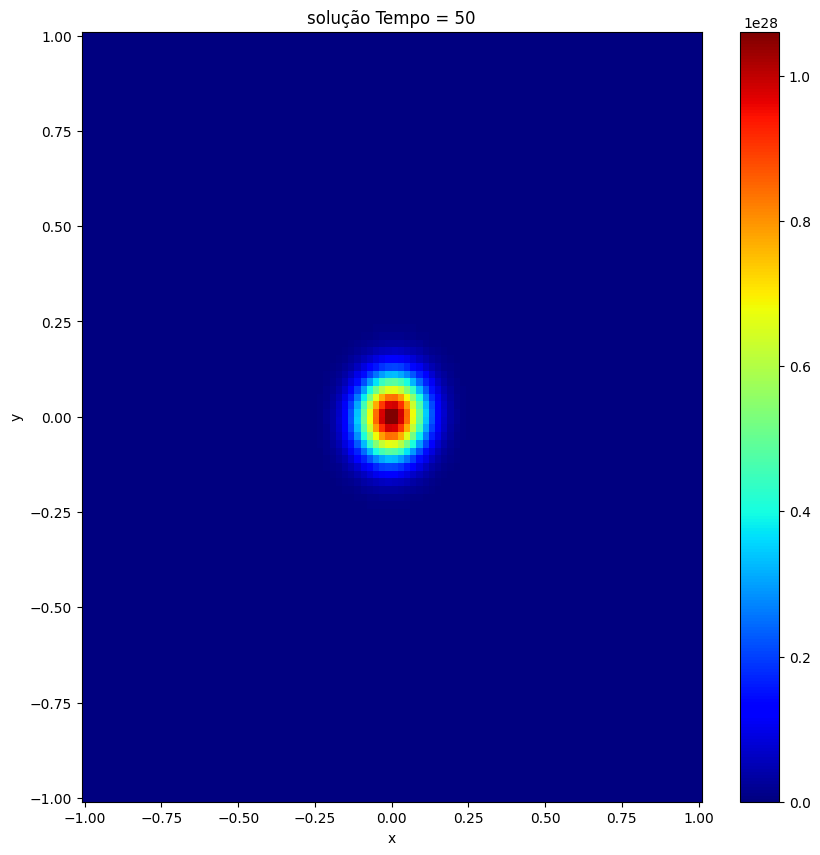

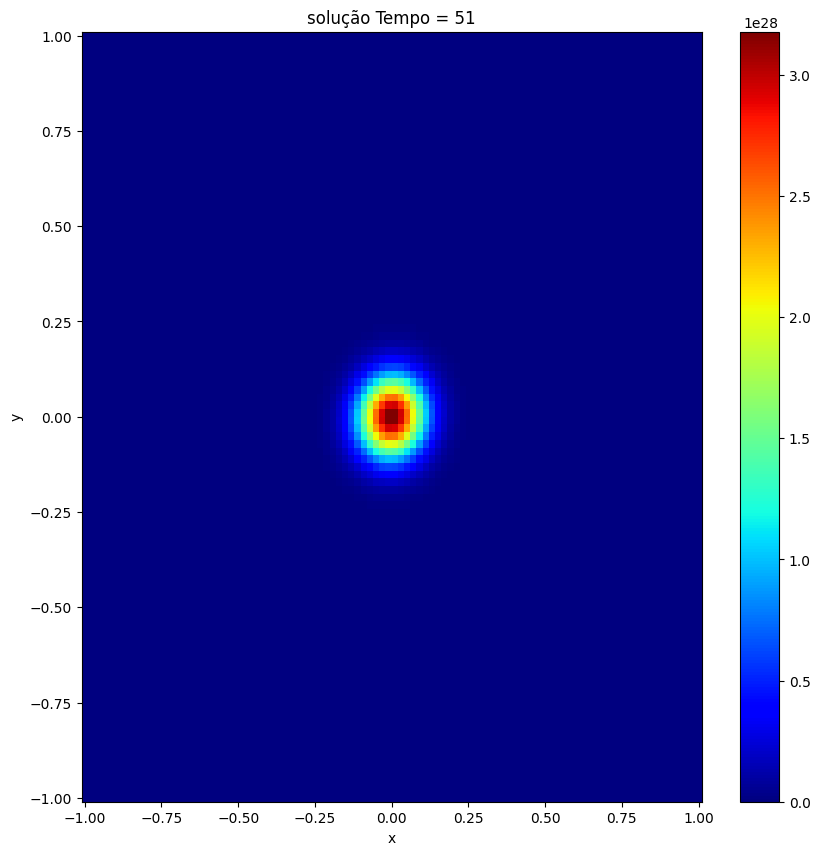

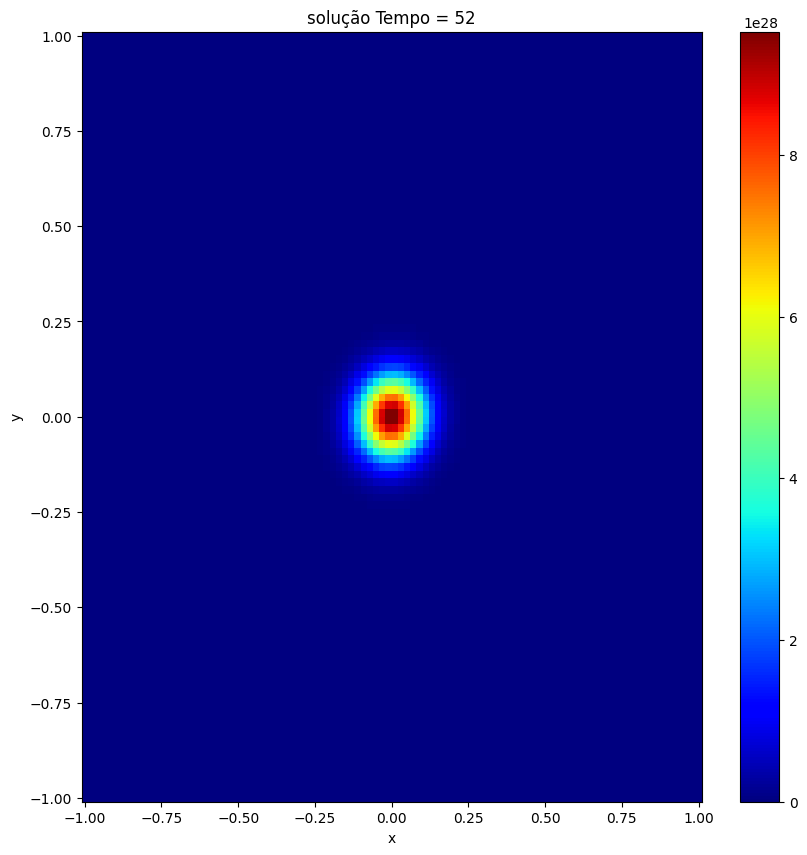

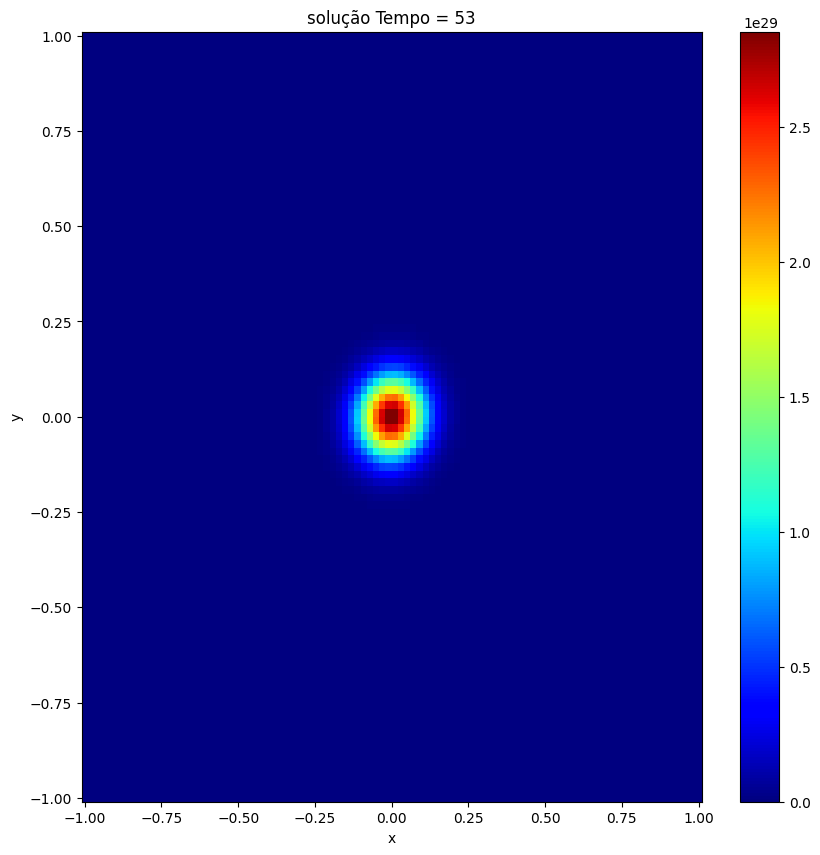

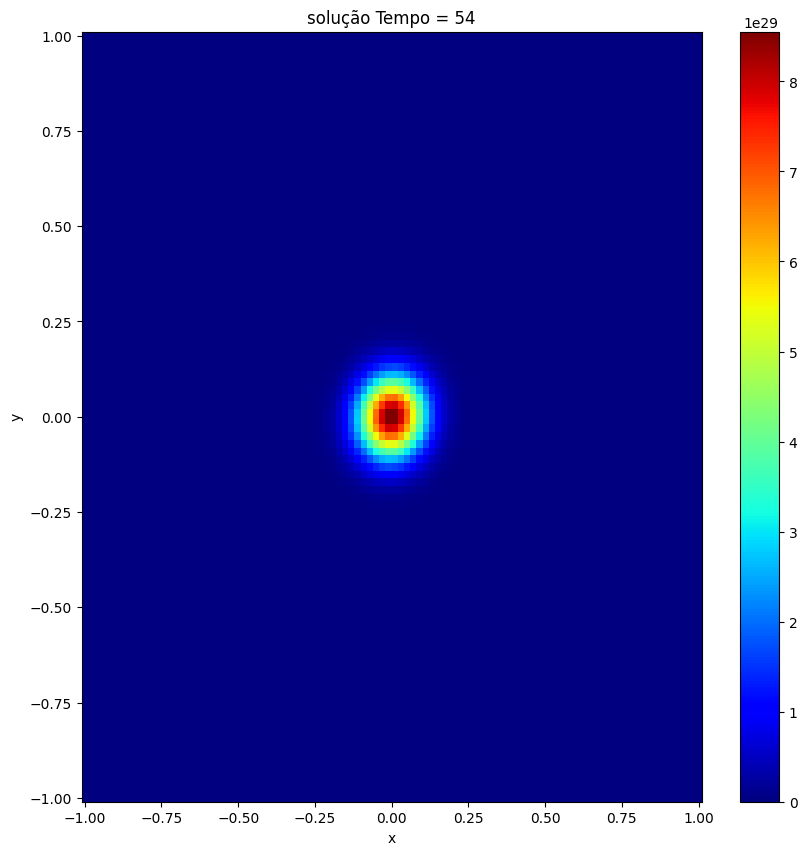

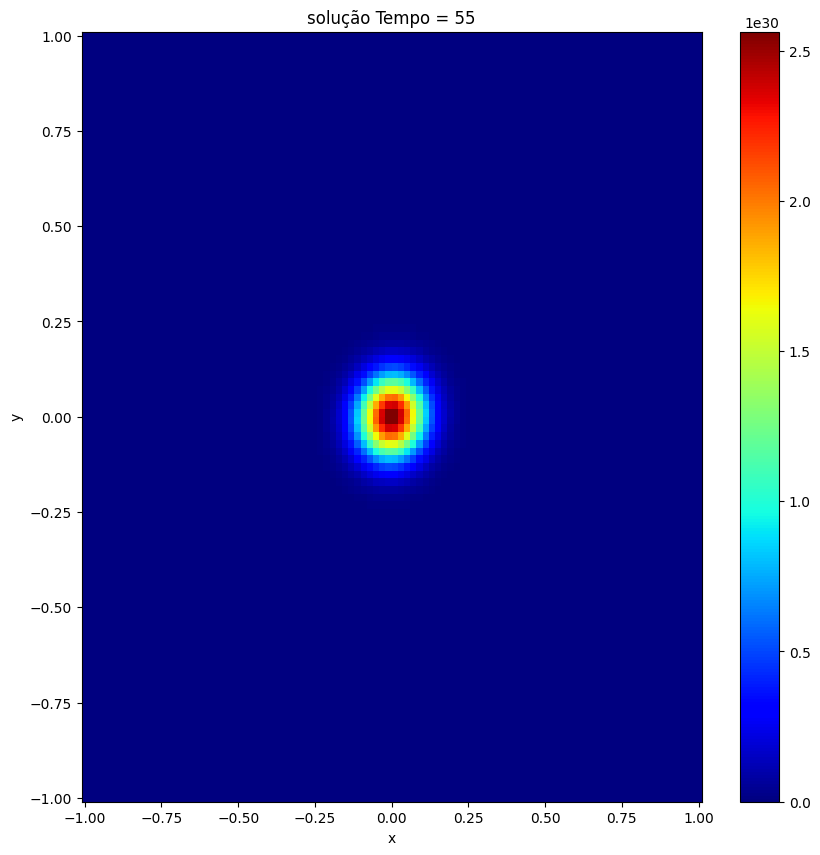

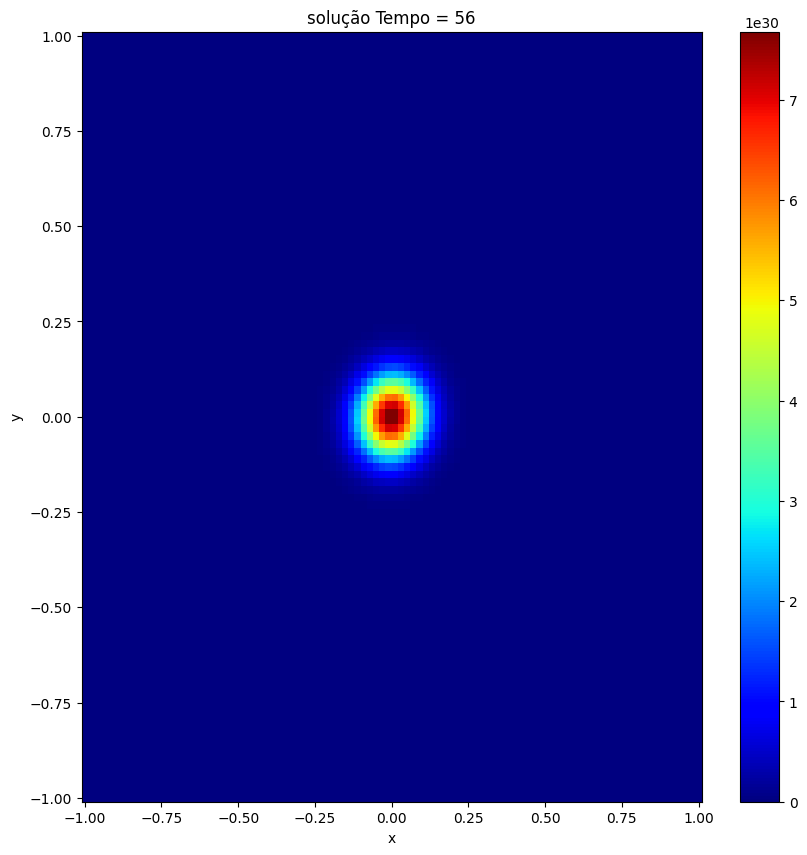

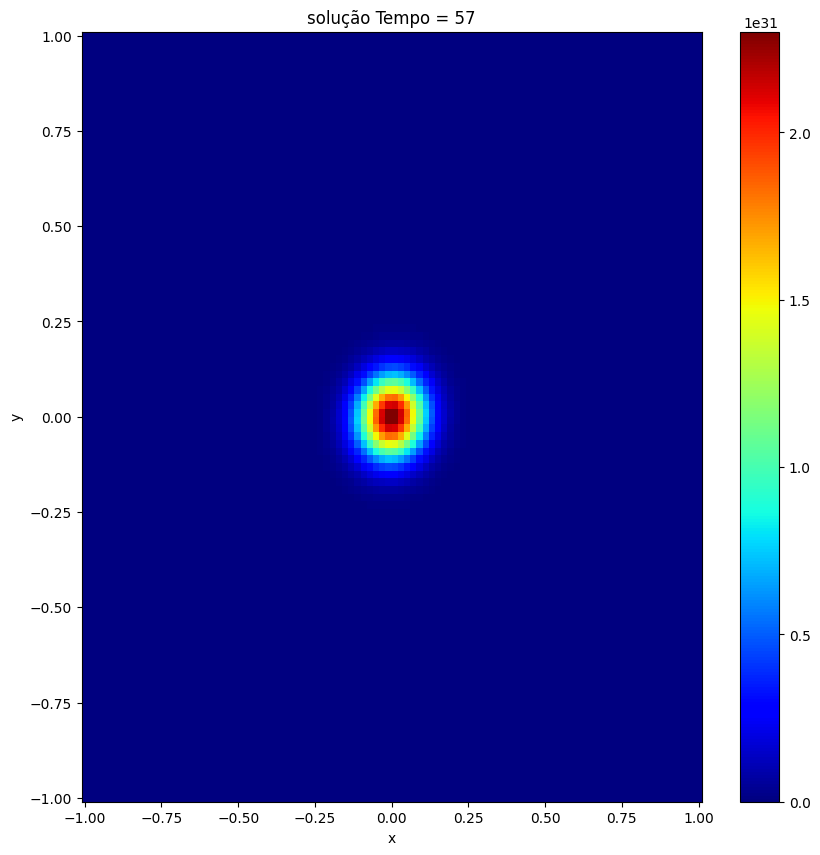

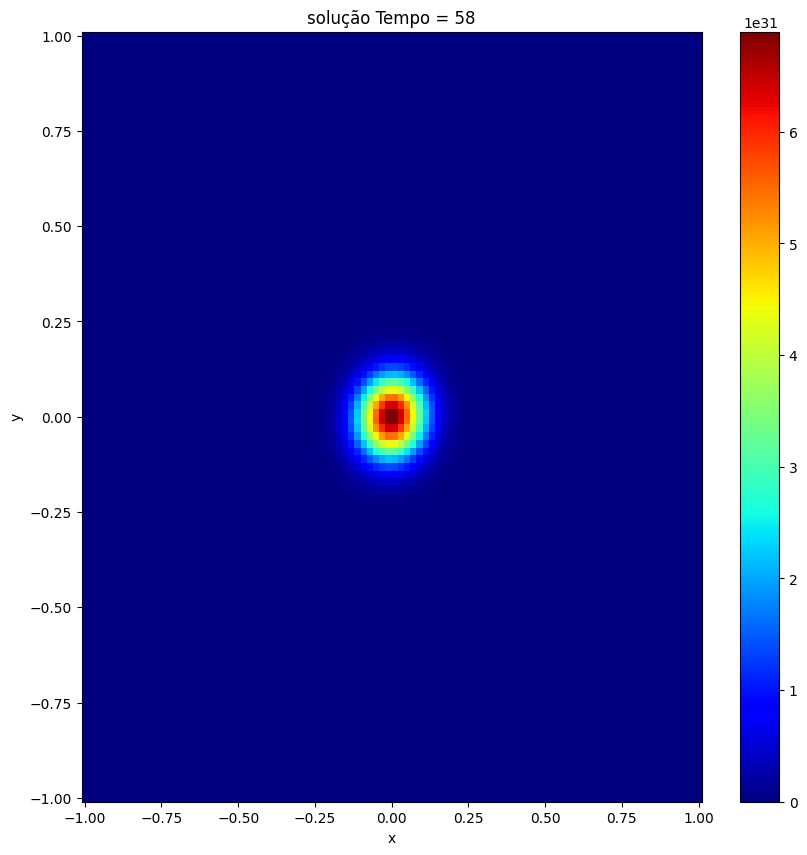

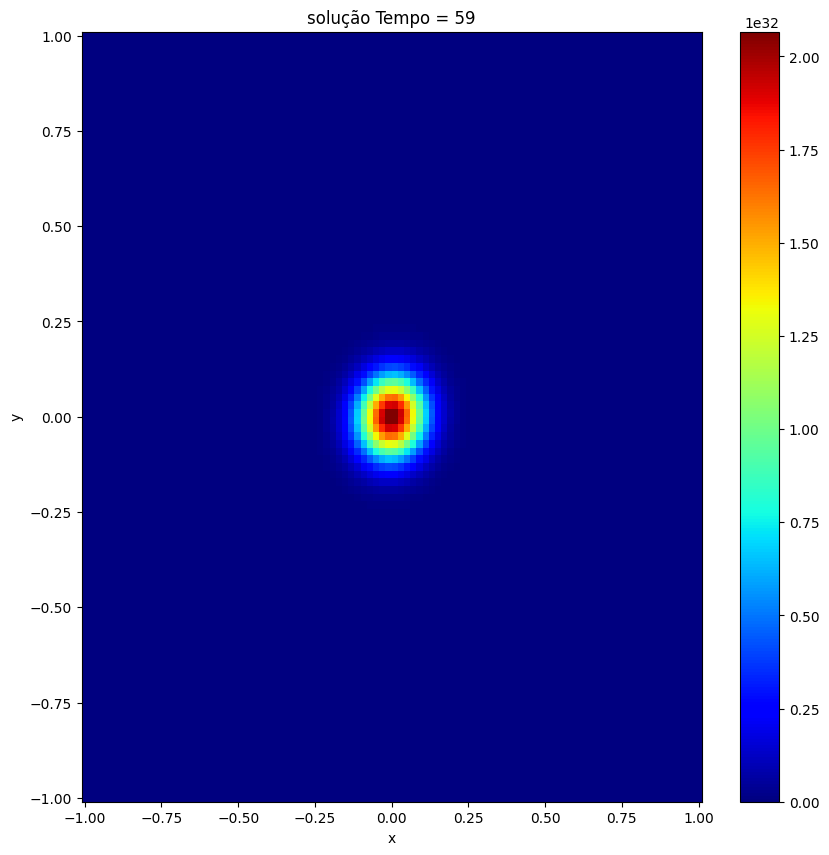

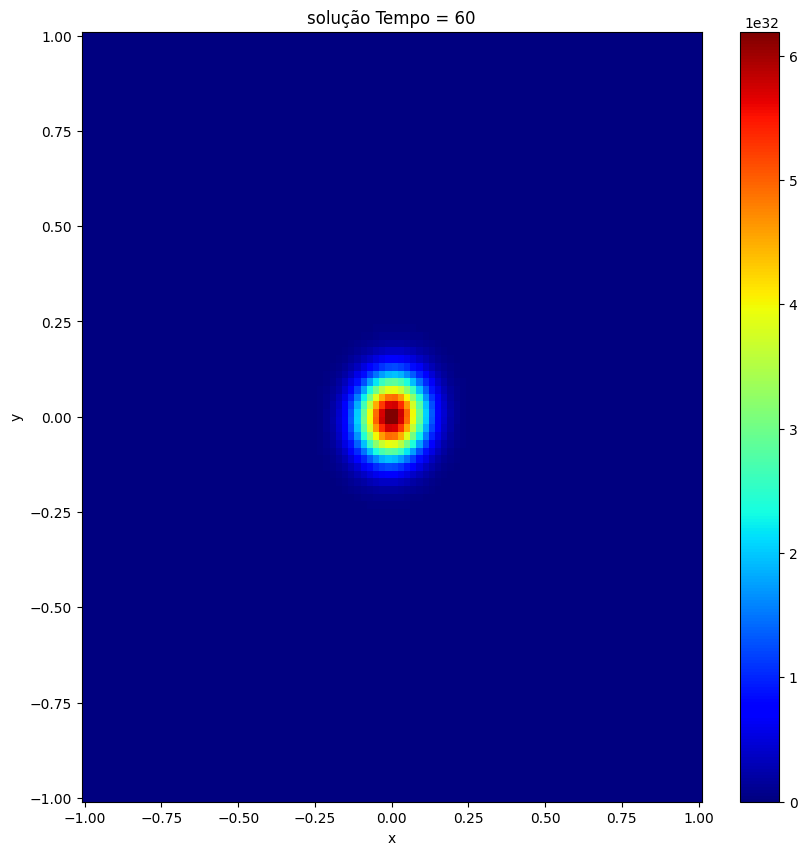

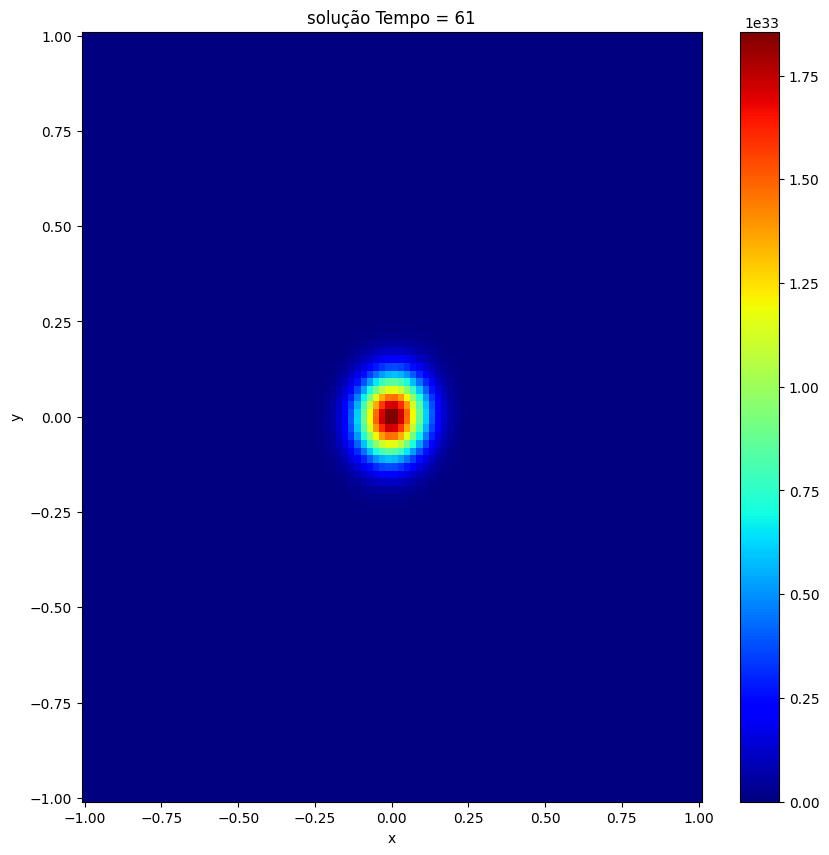

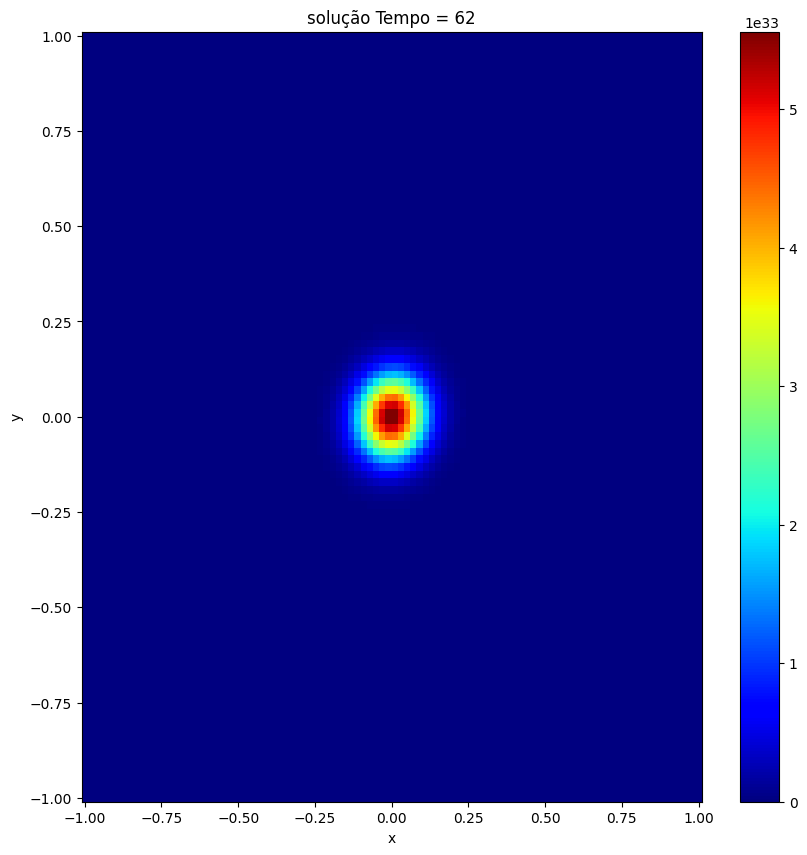

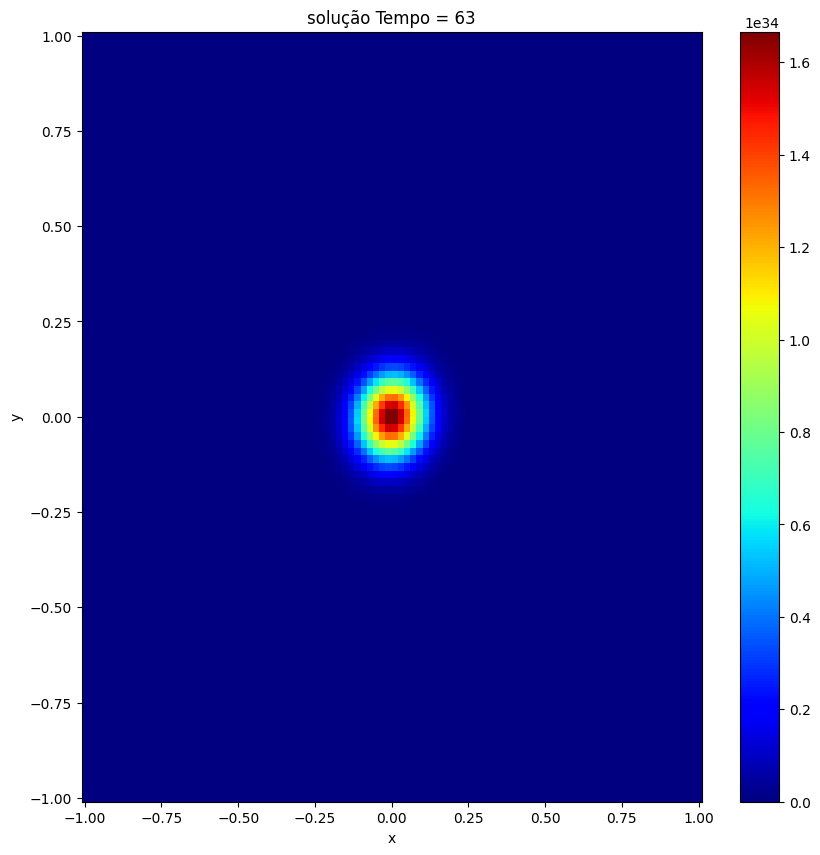

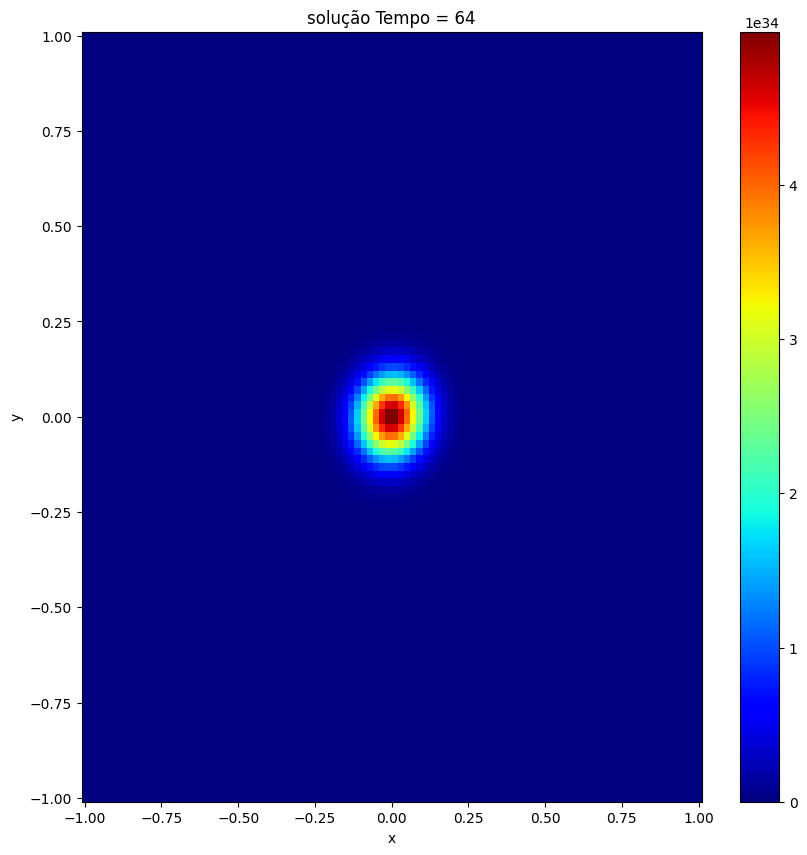

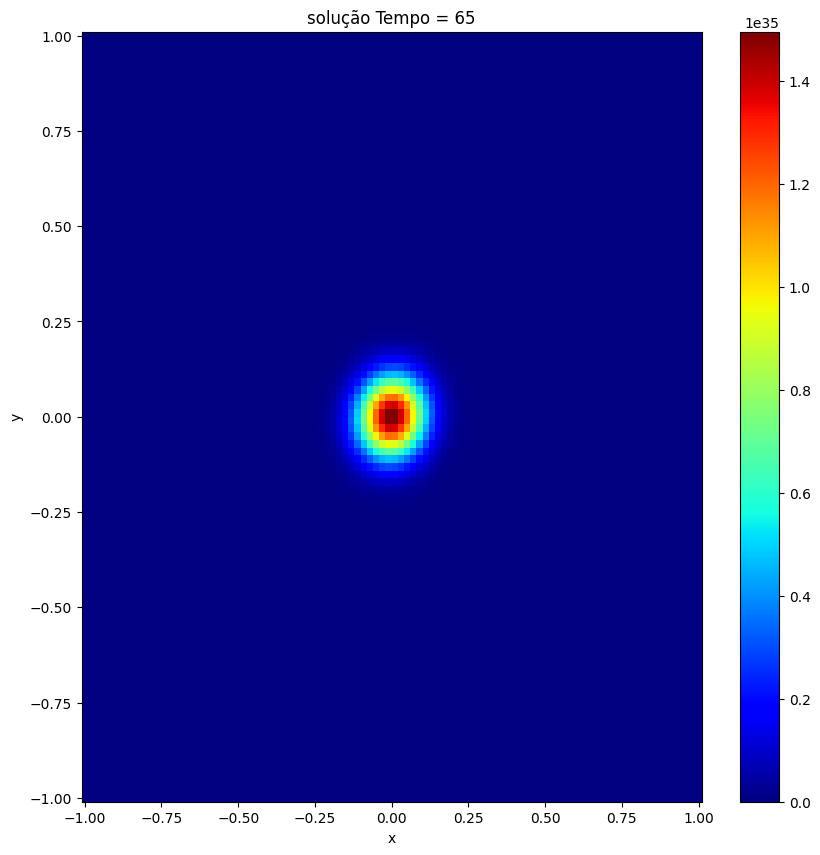

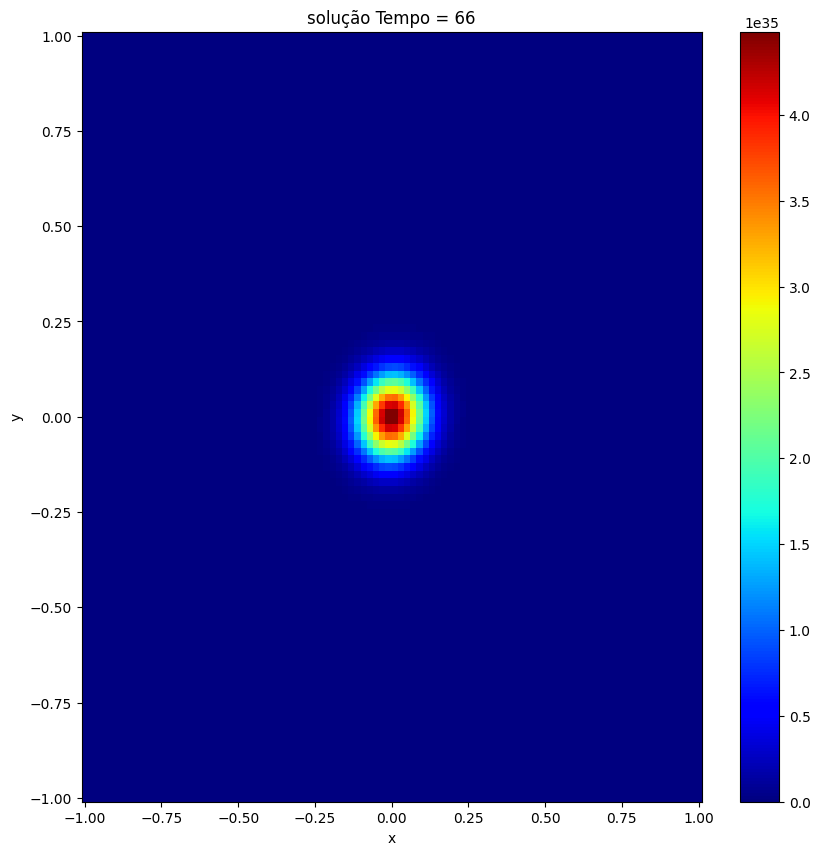

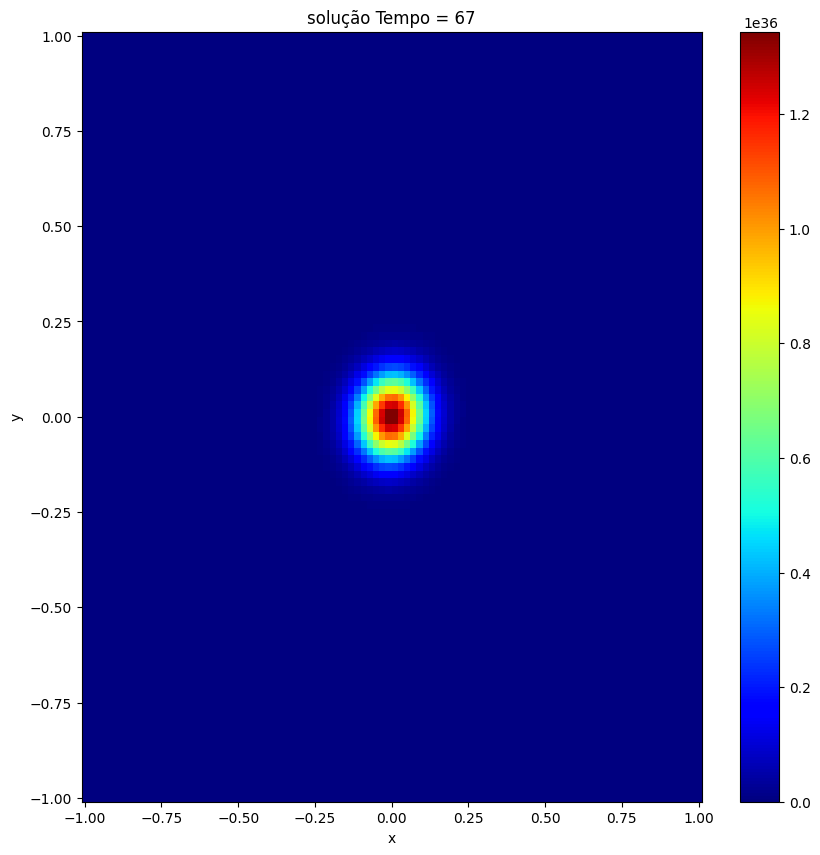

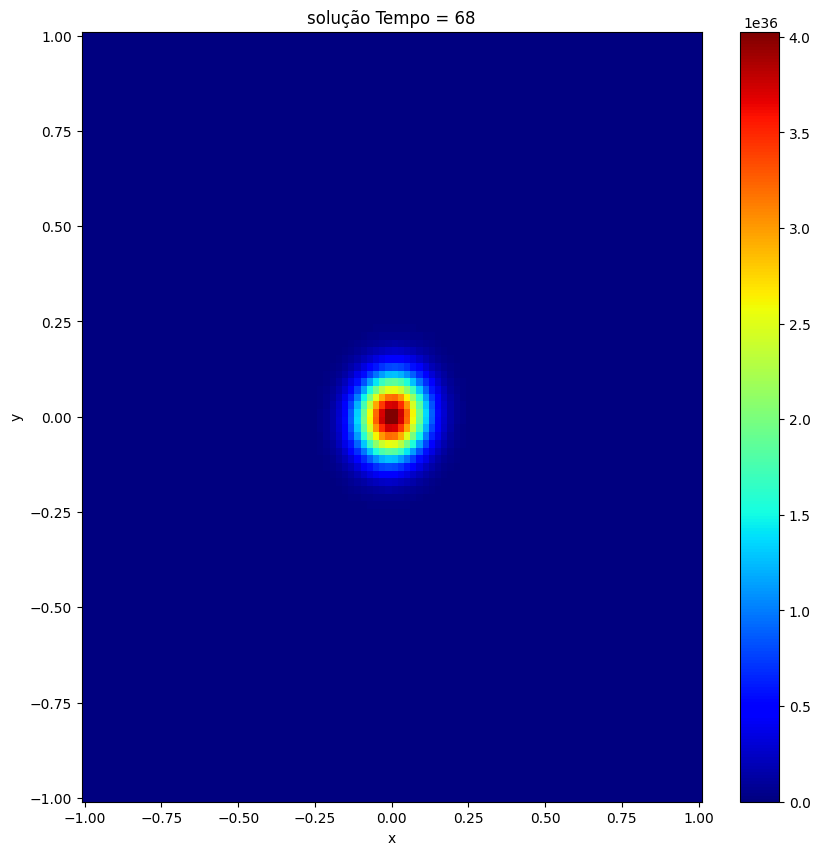

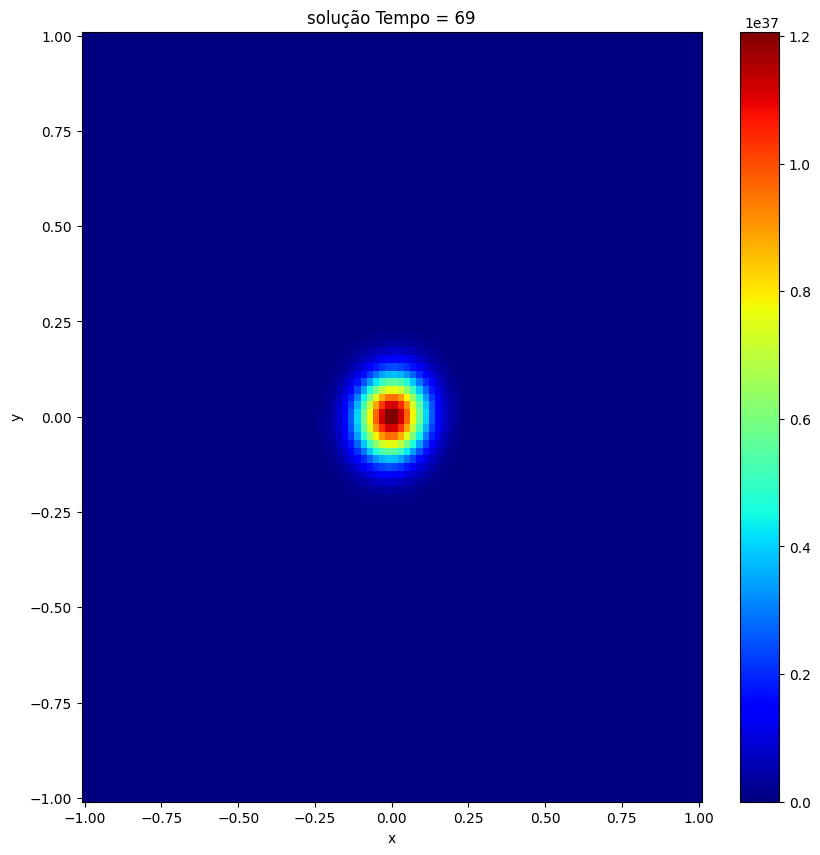

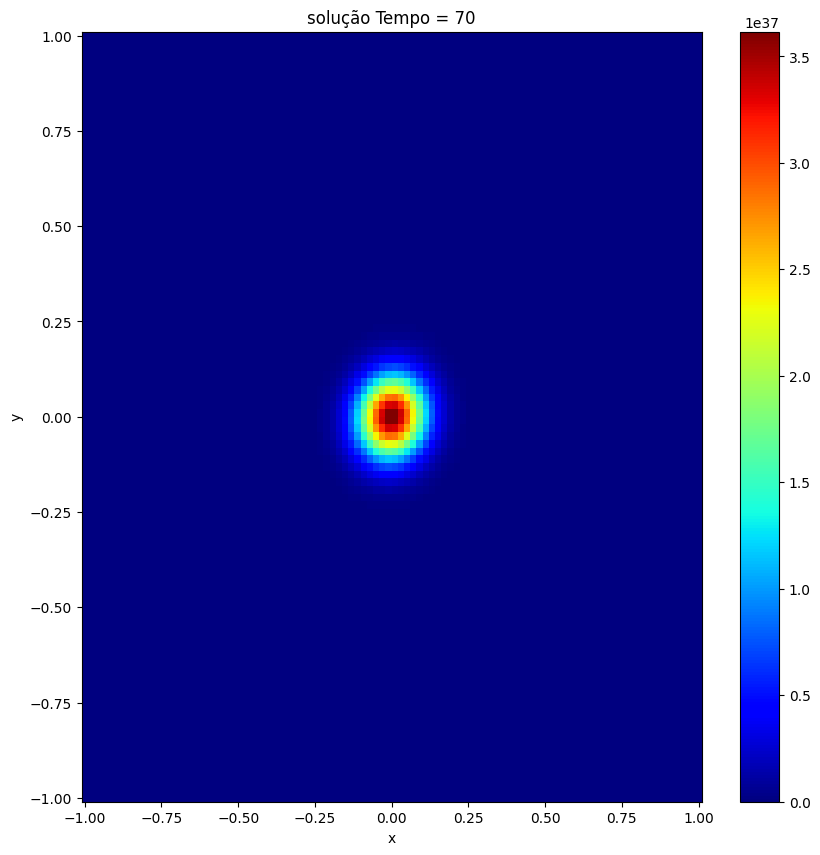

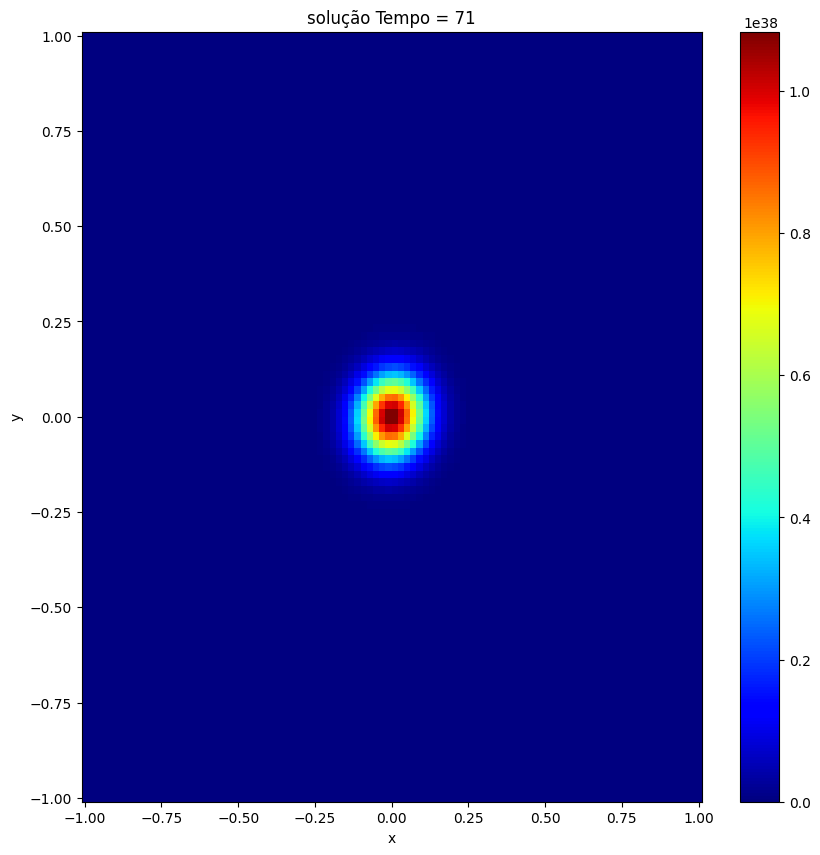

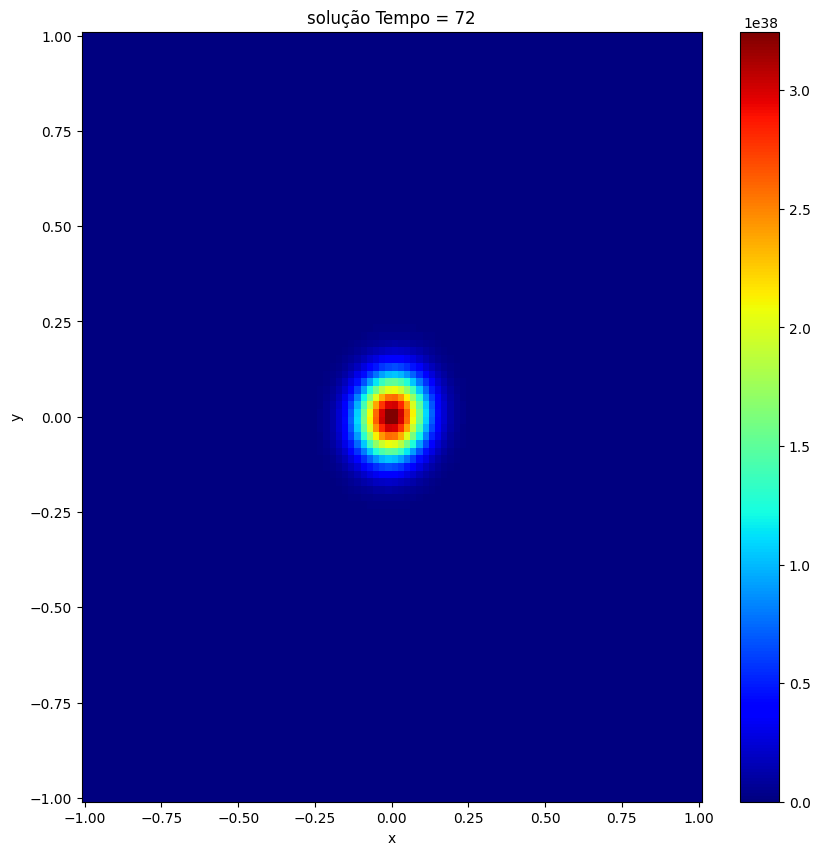

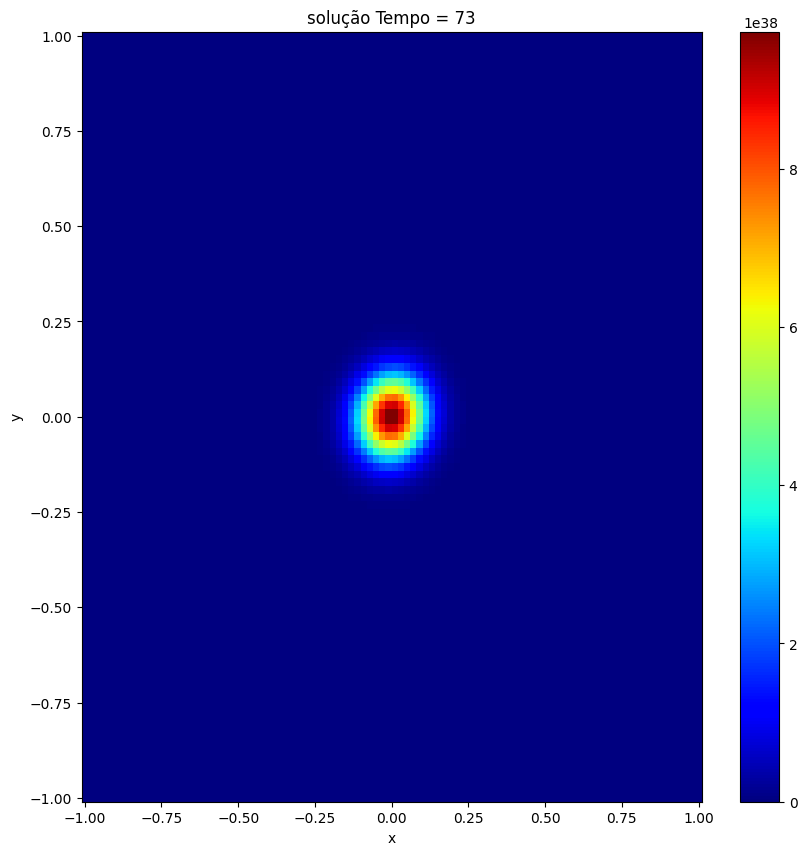

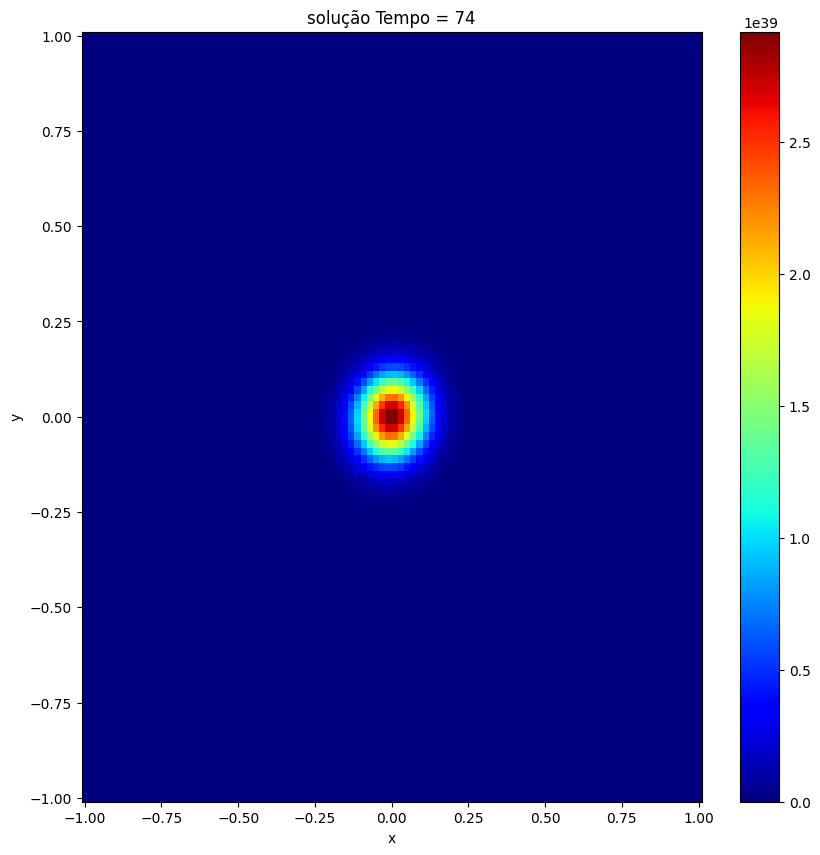

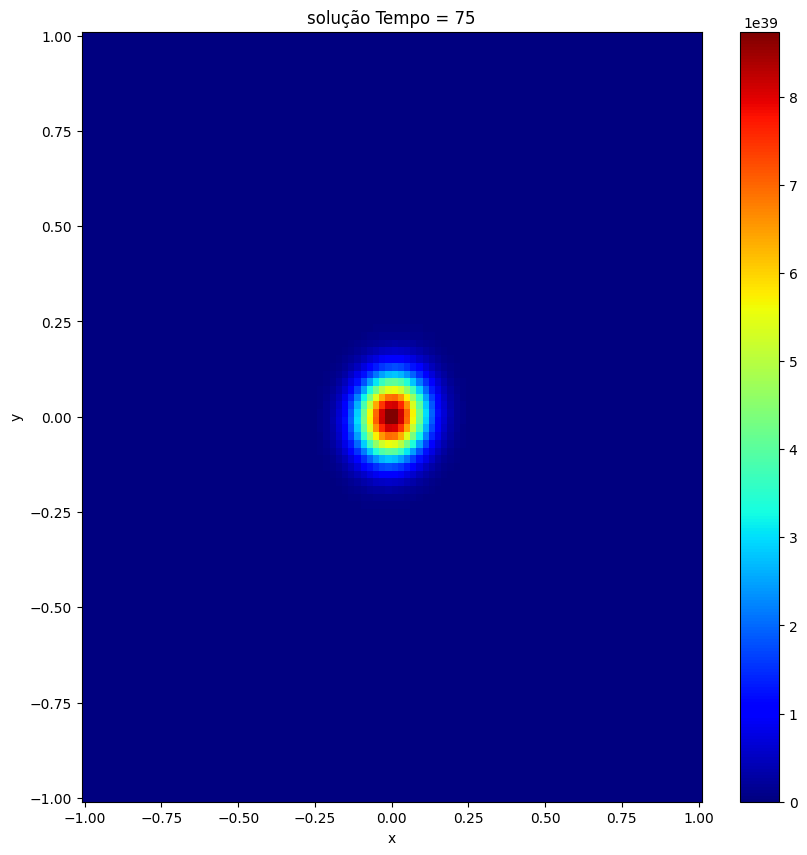

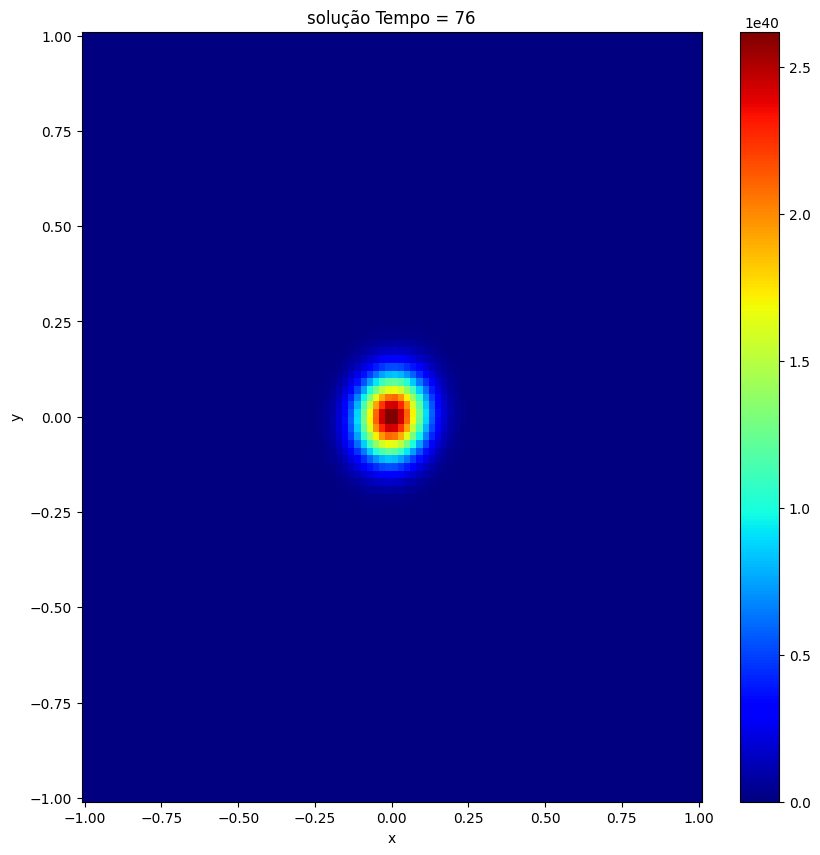

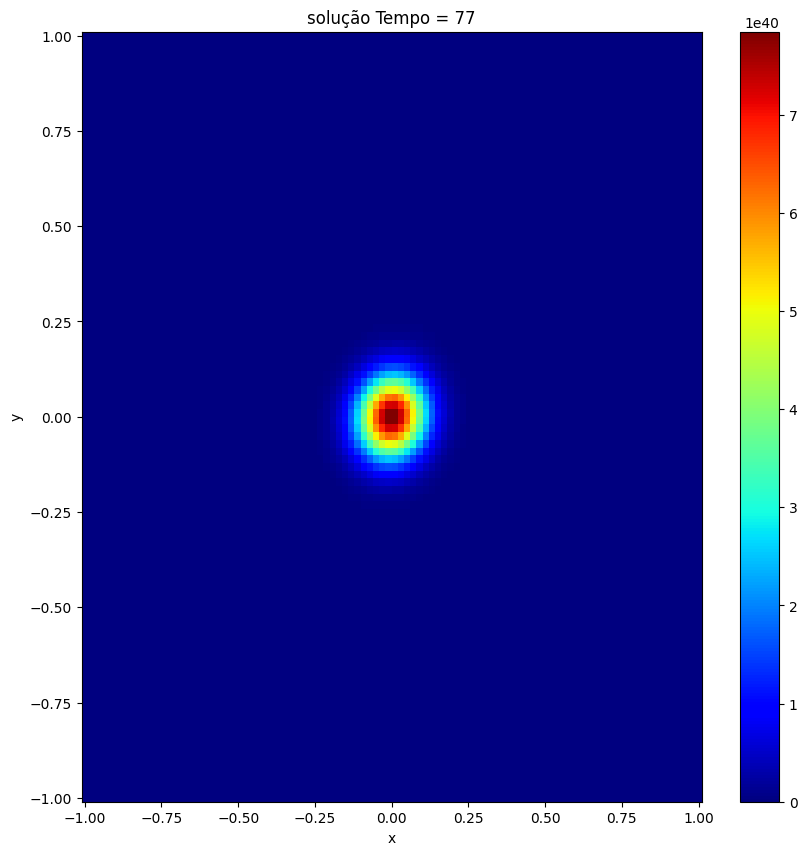

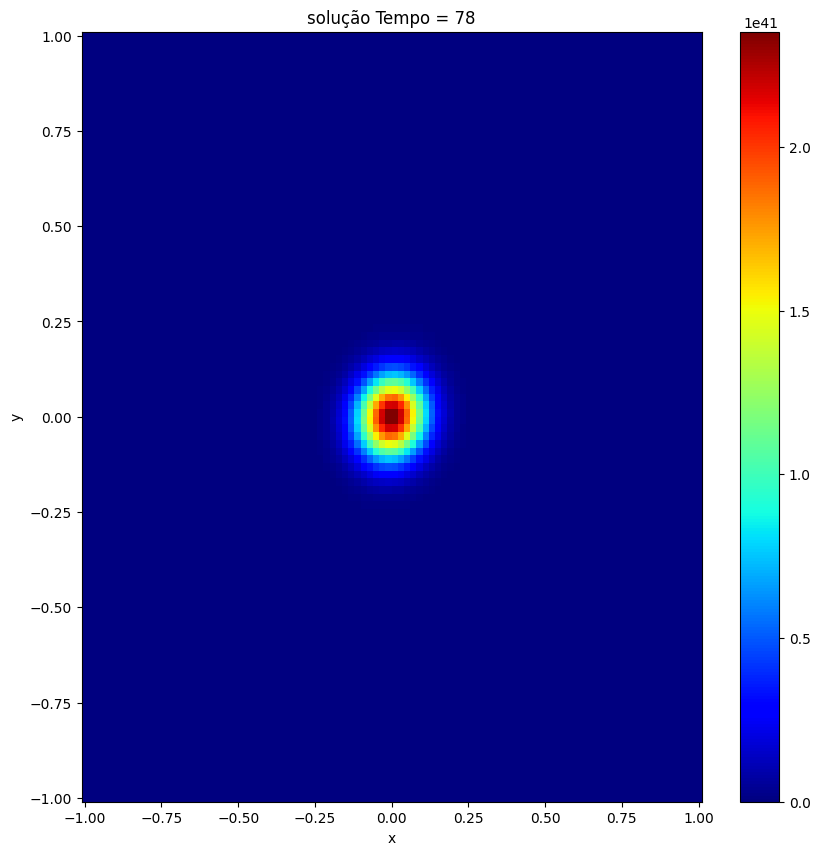

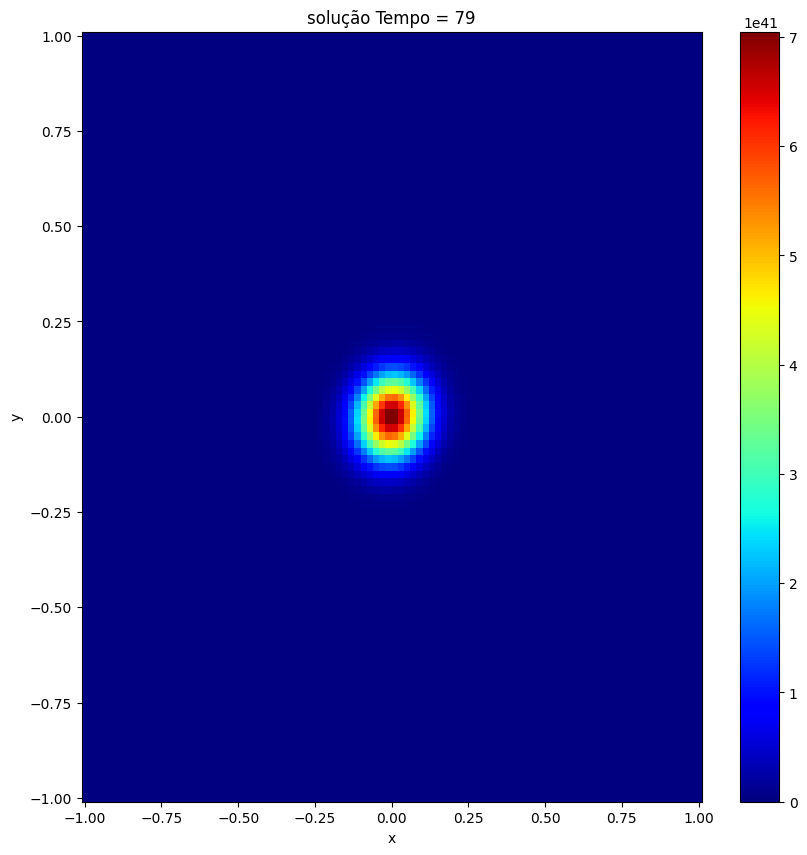

In [10]:
TIME_TOTAL = 80

for t in range(TIME_TOTAL):
    
    SOLUTION = S[t].reshape(TAM,TAM)

    plt.figure(figsize=(10, 10))
    plt.pcolormesh(X, Y, SOLUTION * C0/L**2, cmap = 'jet')
    plt.title(f'solução Tempo = {t}')
    plt.xlabel(f'x')
    plt.ylabel(f'y')
    plt.colorbar()
    plt.show()